In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean
import xmitgcm
%matplotlib inline
import os
import sys
import mds

In [2]:
import matplotlib as mpl        #Used for controlling color
import matplotlib.colors  

In [3]:
from IPython import display
import time

In [4]:
import seaborn as sb
from datetime import date

In [5]:
plt.rcParams.update({'font.size': 16
    , 'legend.markerscale': 1., 'axes.titlesize': 16, 'axes.labelsize' : 16,
      'legend.fontsize' : 14,'legend.handlelength': 3})

plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

color2 = '#6495ed'
color1 = '#ff6347'
color5 = '#8470ff'
color3 = '#3cb371'
color4 = '#ffd700'
color6 = '#ba55d3'
plt.rcParams.update({'figure.figsize' : (14,6)})


In [6]:
dirrun = '/central/groups/oceanphysics/anirban/NA/experiments/run_ll910_test_tides'

In [7]:
ds = xmitgcm.open_mdsdataset(dirrun, iters='all',delta_t=240)

In [8]:
ds

<xarray.Dataset>
Dimensions:   (XC: 910, XG: 910, YC: 266, YG: 266, Z: 100, Zl: 100, Zp1: 101, Zu: 100, time: 480)
Coordinates:
  * XC        (XC) >f4 -81.54167 -81.458336 -81.375 ... -5.8750024 -5.7916694
  * YC        (YC) >f4 26.889458 26.95777 27.02604 ... 43.38593 43.44224
  * XG        (XG) >f4 -81.583336 -81.5 -81.41667 ... -5.9166694 -5.833336
  * YG        (YG) >f4 26.855293 26.923624 26.991915 ... 43.35776 43.414097
  * Z         (Z) >f4 -2.5 -7.5 -12.5 -17.5 ... -5568.185 -5790.69 -6018.94
  * Zp1       (Zp1) >f4 0.0 -5.0 -10.0 -15.0 ... -5678.0 -5903.38 -6134.5
  * Zu        (Zu) >f4 -5.0 -10.0 -15.0 -20.0 ... -5678.0 -5903.38 -6134.5
  * Zl        (Zl) >f4 0.0 -5.0 -10.0 -15.0 ... -5458.37 -5678.0 -5903.38
    rA        (YC, XC) >f4 dask.array<shape=(266, 910), chunksize=(266, 910)>
    dxG       (YG, XC) >f4 dask.array<shape=(266, 910), chunksize=(266, 910)>
    dyG       (YC, XG) >f4 dask.array<shape=(266, 910), chunksize=(266, 910)>
    Depth     (YC, XC) >f4 dask.array

In [9]:
int(len(ds.ETAN)/24)

20

In [10]:
figdir = 'Figs_tidal_amp_ph/'

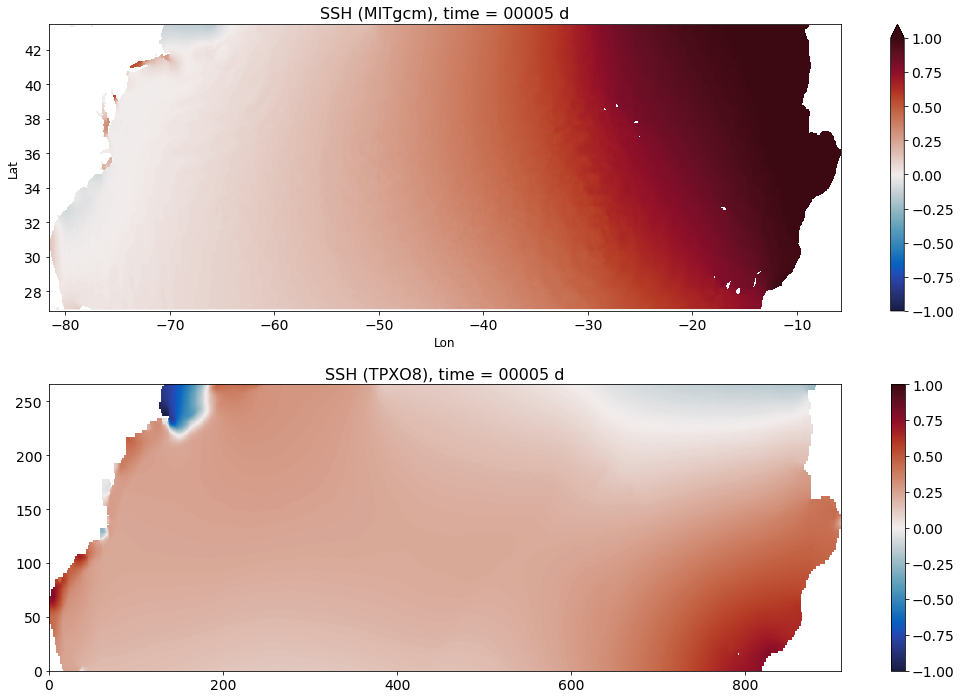

KeyboardInterrupt: 

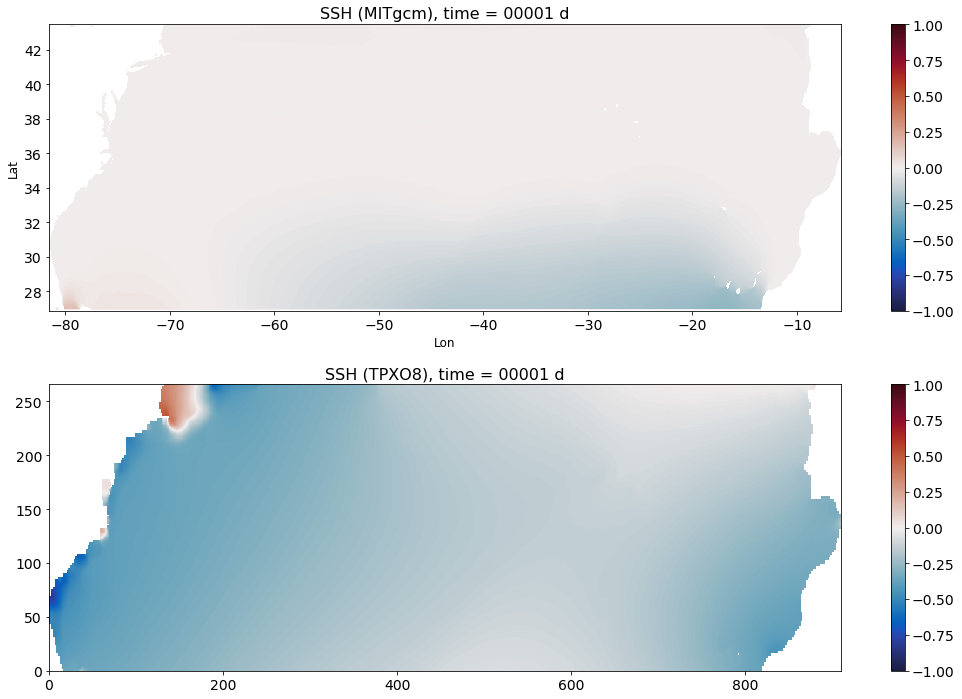

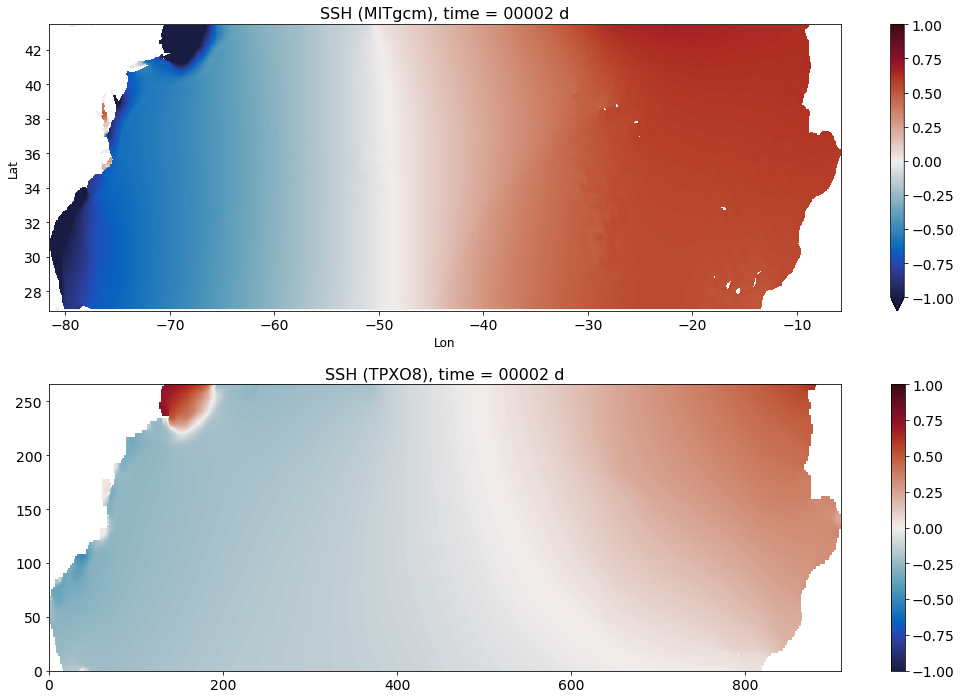

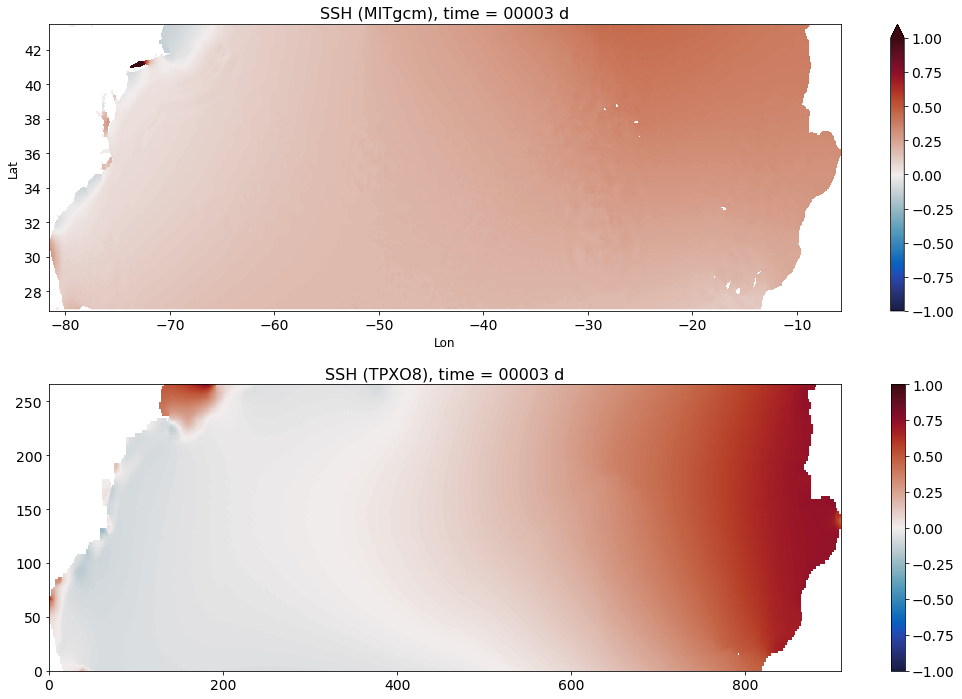

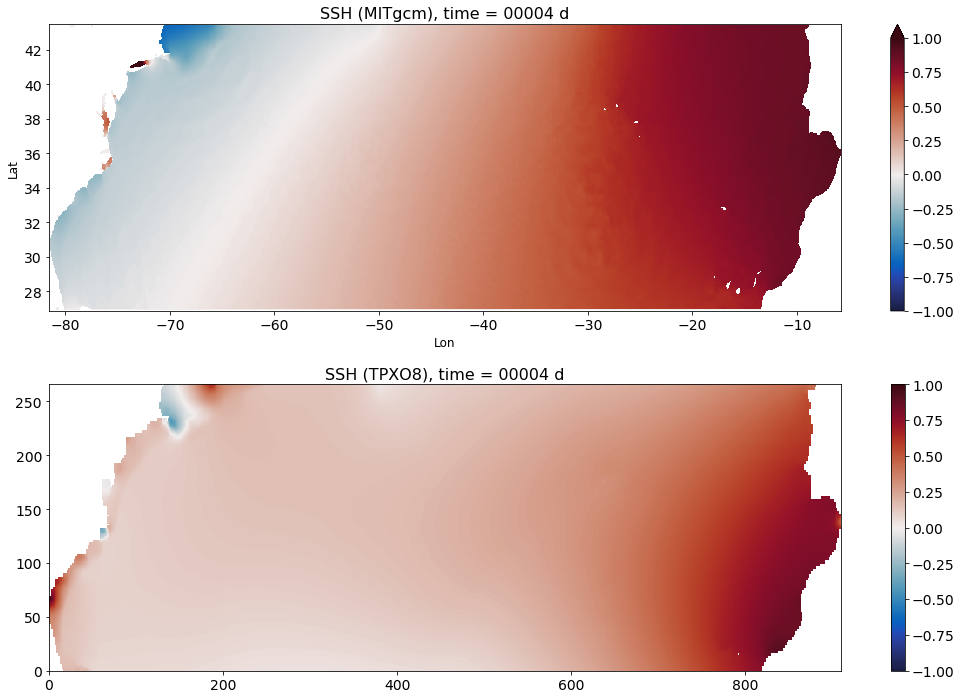

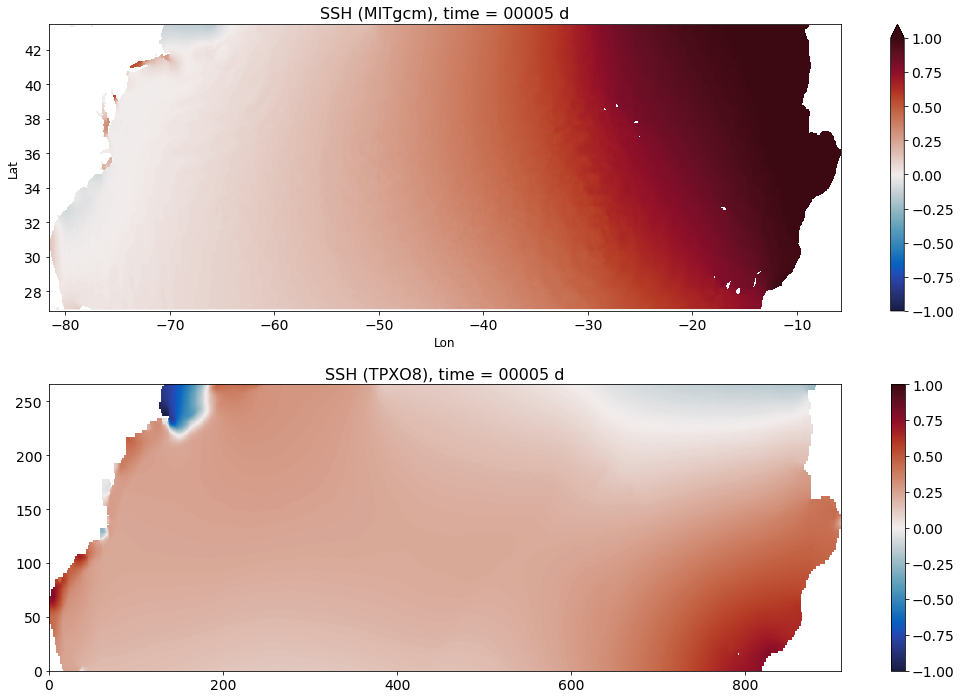

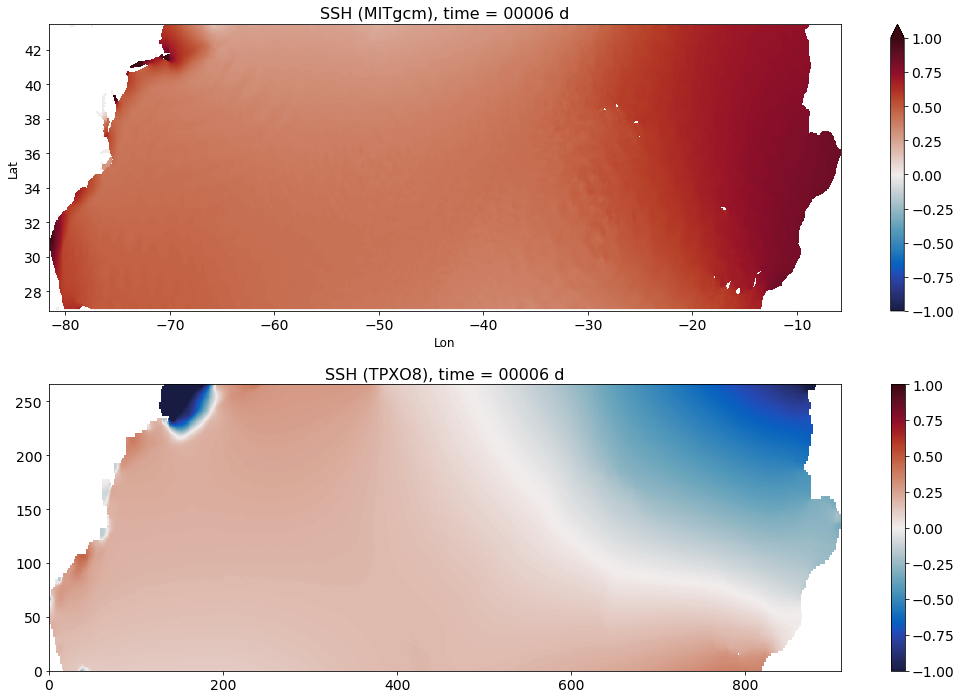

In [196]:
for i in range(20):
    plt.figure(figsize=(15,10))
    plt.subplot(211)
    ds.ETAN.where(ds.hFacC[0]).isel(time=i*24).plot(vmax=1, vmin=-1, cmap=cmocean.cm.balance, add_labels=False)
    #plt.clim([-1,1]);plt.colorbar()
    plt.xlabel('Lon', fontsize=12)
    plt.ylabel('Lat', fontsize=12)
    plt.title('SSH (MITgcm), time = %05d d' %(i+1))
    
    plt.subplot(212)
    f_amps = open(dir_tides+'am_z_%05d.bin' %(i+1), 'rb')
    am_z = np.fromfile(f_amps, '>f4')
    am_z.shape = (266,910,13)
    f_amps.close()
    f_ph = open(dir_tides+'ph_z_%05d.bin' %(i+1), 'rb')
    ph_z = np.fromfile(f_ph, '>f4')
    ph_z.shape = (266,910,13)
    f_ph.close()
    ph_z_masked = np.ma.masked_where(watermask==True, ph_z)
    am_z_masked = np.ma.masked_where(watermask==True, am_z)
    
    SSH = 100*np.sum(am_z_masked*np.cos(tidalfreq_matrix*times[i] - tidalfreq_matrix*ph_z_masked), axis=2)
    plt.pcolormesh(SSH, cmap=cmocean.cm.balance, vmax=1, vmin=-1); plt.colorbar()
    plt.title('SSH (TPXO8), time = %05d d' %(i+1))
    plt.tight_layout()
    
    plt.savefig(figdir+'SSH_daily_ll910_%05d'%i)

    display.clear_output(wait=True)
    display.display(plt.gcf())

    time.sleep(0.1)

In [16]:
components = ['m2','s2','n2','k2',
              'k1','o1','p1','q1',
              'm4','ms4','mn4','mm','mf',]

tidalPeriod  = np.array([44714.165, 43200.001, 45570.054, 43082.050,
                         86164.077, 92949.636, 86637.200, 96726.086, 
                         22357.091, 21972.022, 22569.042, 2380715.864, 1180295.546 ])
tidalfreq = 1/tidalPeriod
tidalfreq2 = 2*np.pi/tidalPeriod

In [15]:
tidalfreq

array([1.40518901e-04, 1.45444101e-04, 1.37879699e-04, 1.45842301e-04,
       7.29211700e-05, 6.75977398e-05, 7.25229498e-05, 6.49585398e-05,
       2.81037694e-04, 2.85962999e-04, 2.78398406e-04, 2.63920000e-06,
       5.32340000e-06])

In [12]:
dir_tides = '/central/groups/oceanphysics/anirban/tides_tpxo8_wEBC_ll910/'
dirrun = '/central/groups/oceanphysics/anirban/NA/experiments/test_run'


In [17]:
f_amps = open(dir_tides+'am_z_00010.bin', 'rb')
am_z = np.fromfile(f_amps, '>f4')
am_z.shape = (266,910,13)
f_ph = open(dir_tides+'ph_z_00010.bin', 'rb')
ph_z = np.fromfile(f_ph, '>f4')
ph_z.shape = (266,910,13)

ph_z_masked = np.ma.masked_where(ph_z==0, ph_z)
am_z_masked = np.ma.masked_where(ph_z==0, am_z)

watermask = ph_z_masked.mask
landmask = np.ma.masked_where(watermask!=True, watermask)  

In [18]:
am_z_masked.shape

(266, 910, 13)

In [19]:
ds = xmitgcm.open_mdsdataset(dirrun, iters='all',delta_t=240)

Text(0.5,1,'SSH (MITgcm), time = 00000 d')

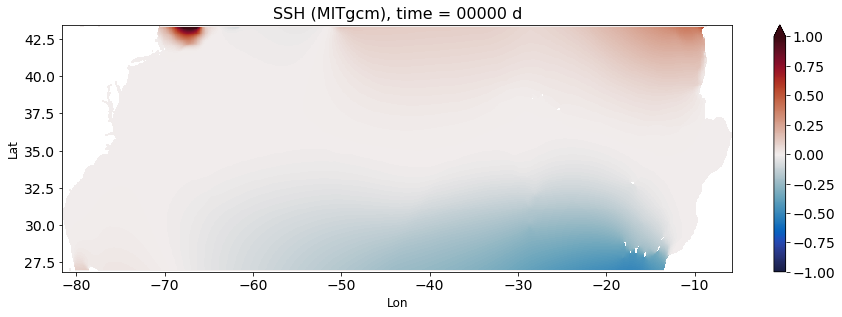

In [20]:
i = 0
plt.figure(figsize=(15,10))
plt.subplot(211)
ds.ETAN.where(ds.hFacC[0]).isel(time=i*24).plot(vmax=1, vmin=-1, cmap=cmocean.cm.balance, add_labels=False)
#plt.clim([-1,1]);plt.colorbar()
plt.xlabel('Lon', fontsize=12)
plt.ylabel('Lat', fontsize=12)
plt.title('SSH (MITgcm), time = %05d d' %(i))

In [30]:
ds.ETAN

<xarray.DataArray 'ETAN' (time: 480, YC: 266, XC: 910)>
dask.array<shape=(480, 266, 910), dtype=float32, chunksize=(1, 266, 910)>
Coordinates:
  * XC       (XC) >f4 -81.54167 -81.458336 -81.375 ... -5.8750024 -5.7916694
  * YC       (YC) >f4 26.889458 26.95777 27.02604 ... 43.38593 43.44224
    rA       (YC, XC) >f4 dask.array<shape=(266, 910), chunksize=(266, 910)>
    Depth    (YC, XC) >f4 dask.array<shape=(266, 910), chunksize=(266, 910)>
    maskInC  (YC, XC) >f4 dask.array<shape=(266, 910), chunksize=(266, 910)>
    iter     (time) int64 dask.array<shape=(480,), chunksize=(1,)>
  * time     (time) int64 3600 7200 10800 14400 ... 1720800 1724400 1728000
Attributes:
    standard_name:  ETAN
    long_name:      Surface Height Anomaly
    units:          m

In [68]:
f_amps = open(dir_tides+'am_z_00001.bin', 'rb')
am_z = np.fromfile(f_amps, '>f4')
am_z.shape = (266,910,13)
f_ph = open(dir_tides+'ph_z_00001.bin', 'rb')
ph_z = np.fromfile(f_ph, '>f4')
ph_z.shape = (266,910,13)

ph_z_masked = np.ma.masked_where(ph_z==0, ph_z)
am_z_masked = np.ma.masked_where(ph_z==0, am_z)

watermask = ph_z_masked.mask
landmask = np.ma.masked_where(watermask!=True, watermask)  

In [ ]:
SSH0 = 100*am_z_masked[:,:,0]*np.cos(tidalfreq2[0]*times - tidalfreq2[0]*ph_z_masked[:,:,0])

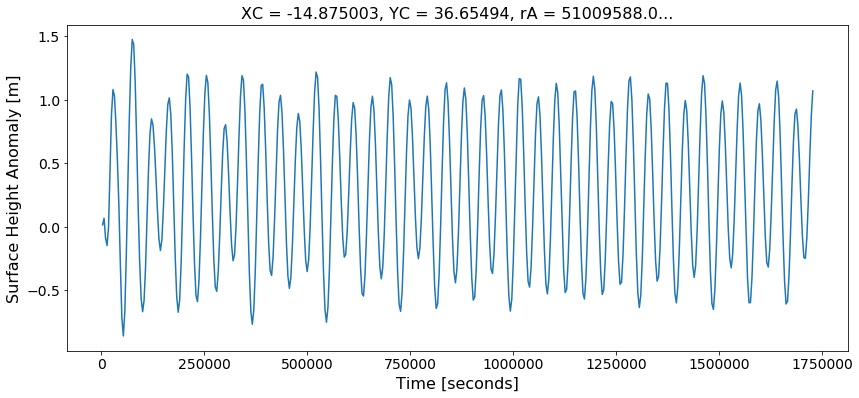

In [32]:
ds.ETAN.isel(XC=800,YC=150).plot()

In [50]:
times = np.linspace(0,29,30)*86400
time_d = times/86400

In [120]:
SSH0.shape

(480, 266, 910)

In [92]:
watermask[:,:,0].shape

(266, 910)

In [103]:
times = np.linspace(1,480,480)*3600
time_d = times/86400

In [112]:
time_d[23::24]

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20.])

In [105]:
ds.time

<xarray.DataArray 'time' (time: 480)>
array([   3600,    7200,   10800, ..., 1720800, 1724400, 1728000])
Coordinates:
    iter     (time) int64 dask.array<shape=(480,), chunksize=(1,)>
  * time     (time) int64 3600 7200 10800 14400 ... 1720800 1724400 1728000
Attributes:
    standard_name:  time
    long_name:      Time
    axis:           T
    units:          seconds
    calendar:       gregorian

In [125]:
times[0]

3600.0

In [106]:
SSH0 = np.ma.zeros((480,266,910))
f_amps = open(dir_tides+'am_z_00001.bin', 'rb')
am_z = np.fromfile(f_amps, '>f4')
am_z.shape = (266,910,13)
f_amps.close()
f_ph = open(dir_tides+'ph_z_00001.bin', 'rb')
ph_z = np.fromfile(f_ph, '>f4')
ph_z.shape = (266,910,13)
f_ph.close()
ph_z_masked = np.ma.masked_where(watermask==True, ph_z)
am_z_masked = np.ma.masked_where(watermask==True, am_z)
for j in range(480):
    SSH0[j] = 100*am_z_masked[:,:,0]*np.cos(tidalfreq2[0]*times[j] - tidalfreq2[0]*ph_z_masked[:,:,0])
    SSH0[j] = np.ma.masked_where(watermask[:,:,0]==True, SSH0[j])

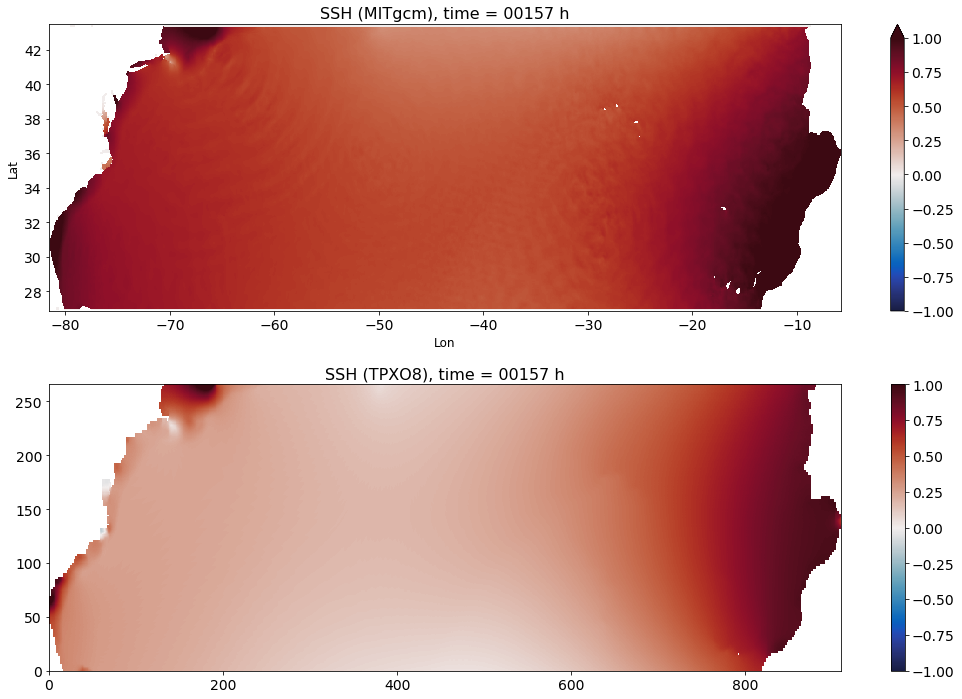

/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


KeyboardInterrupt: 

In [ ]:
for i in range(480):
    plt.figure(figsize=(15,10))
    plt.subplot(211)
    ds.ETAN.where(ds.hFacC[0]).isel(time=i).plot(vmax=1, vmin=-1, cmap=cmocean.cm.balance, add_labels=False)
    plt.xlabel('Lon', fontsize=12)
    plt.ylabel('Lat', fontsize=12)
    plt.title('SSH (MITgcm), time = %05d h' %(i+1))
    
    plt.subplot(212)
    plt.pcolormesh(SSH0[i], cmap=cmocean.cm.balance, vmax=1, vmin=-1); plt.colorbar()
    plt.title('SSH (TPXO8), time = %05d h' %(i+1))
    plt.tight_layout()
    
    plt.savefig(figdir+'SSH_1ctides_hourly_startdate20080101_ll910_%05d'%i)

    display.clear_output(wait=True)
    display.display(plt.gcf())

    time.sleep(0.1)
    

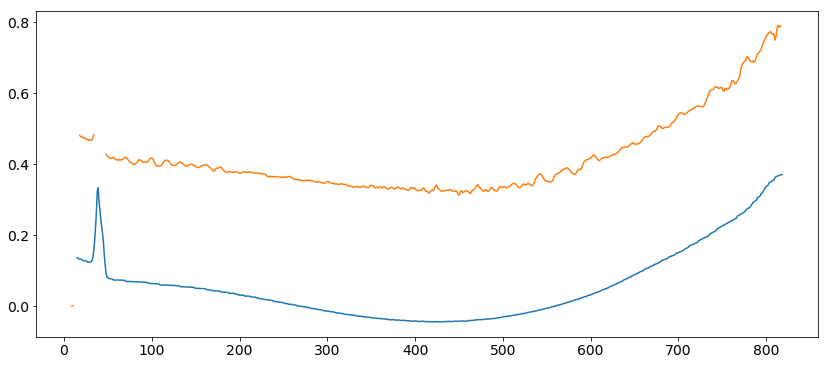

In [145]:
i = 120

plt.plot(SSH0[i,2,:],label =r'TPXO, $\omega = 2\pi/T_{tidal}$, startdate only')


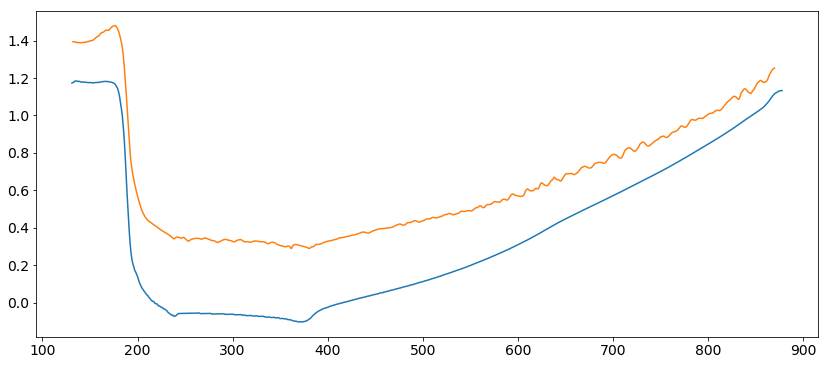

In [141]:
i = 120

plt.plot(SSH0[i,-3,:])
plt.plot(ds.ETAN.where(ds.hFacC[0]).isel(time=i).values[-3])

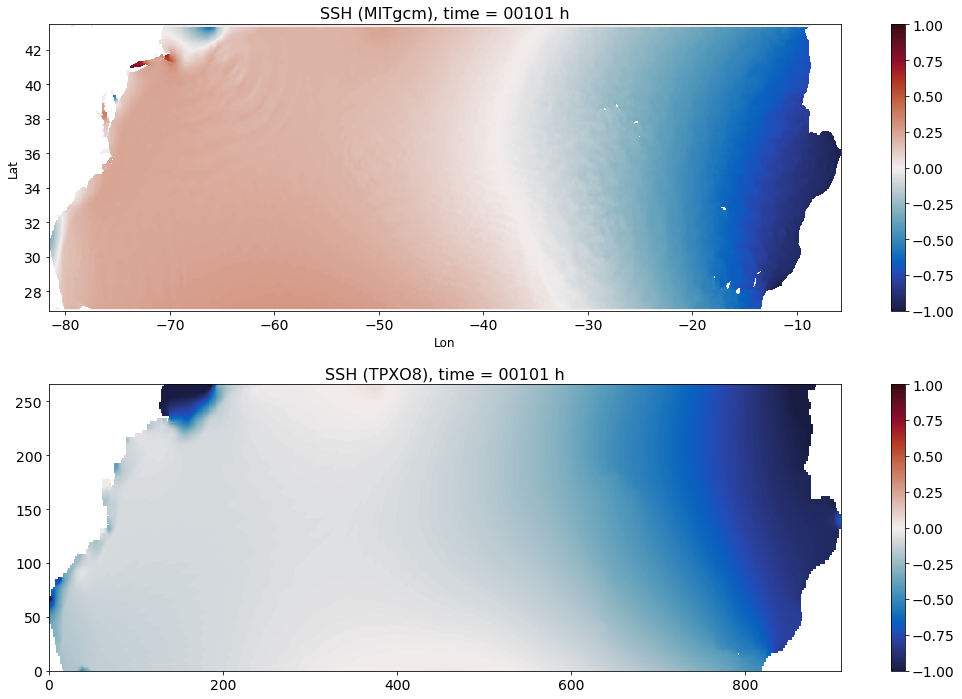

In [123]:
i = 100
plt.figure(figsize=(15,10))
plt.subplot(211)
ds.ETAN.where(ds.hFacC[0]).isel(time=i).plot(vmax=1, vmin=-1, cmap=cmocean.cm.balance, add_labels=False)
plt.xlabel('Lon', fontsize=12)
plt.ylabel('Lat', fontsize=12)
plt.title('SSH (MITgcm), time = %05d h' %(i+1))
    
plt.subplot(212)
plt.pcolormesh(SSH0[i+1], cmap=cmocean.cm.balance, vmax=1, vmin=-1); plt.colorbar()
plt.title('SSH (TPXO8), time = %05d h' %(i+1))
plt.tight_layout()

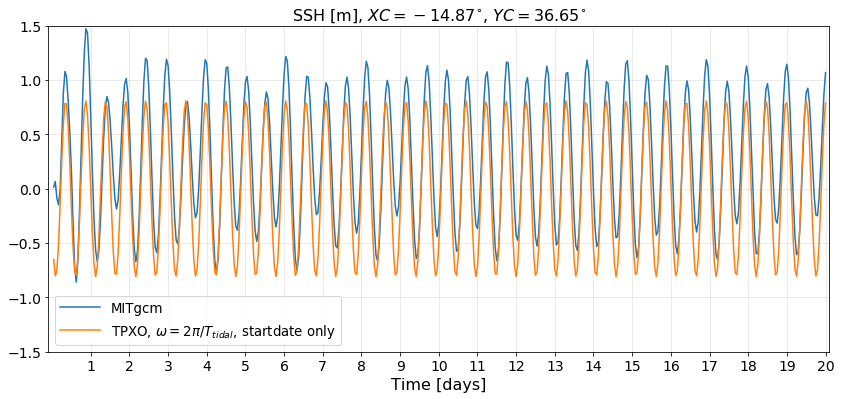

In [117]:
plt.plot(time_d,SSH_mitgcm,label='MITgcm')

plt.plot(time_d,SSH0[:,150,800], label =r'TPXO, $\omega = 2\pi/T_{tidal}$, startdate only')
plt.xticks(time_d[23::24])
plt.xlim([-0.1,20.1])
plt.ylim([-1.5,1.5])
plt.xlabel('Time [days]')
plt.title(r'SSH [m], $XC=-14.87^{\circ}$, $YC=36.65^{\circ}$')
plt.legend(loc=0, fontsize='small')
plt.grid(alpha=0.3)

In [33]:
SSH = np.zeros((30,266,910))
SSH2 = np.zeros((30,266,910))
for j in range(30):
    f_amps = open(dir_tides+'am_z_%05d.bin' %(j+1), 'rb')
    am_z = np.fromfile(f_amps, '>f4')
    am_z.shape = (266,910,13)
    f_amps.close()
    f_ph = open(dir_tides+'ph_z_%05d.bin' %(j+1), 'rb')
    ph_z = np.fromfile(f_ph, '>f4')
    ph_z.shape = (266,910,13)
    f_ph.close()
    ph_z_masked = np.ma.masked_where(watermask==True, ph_z)
    am_z_masked = np.ma.masked_where(watermask==True, am_z)
    SSH2[j] = 100*am_z_masked[:,:,0]*np.cos(tidalfreq2[0]*times[j] - tidalfreq2[0]*ph_z_masked[:,:,0])
    SSH[j] = 100*am_z_masked[:,:,0]*np.cos(tidalfreq[0]*times[j] - tidalfreq[0]*ph_z_masked[:,:,0])


In [39]:
SSH_mitgcm = ds.ETAN.isel(XC=800,YC=150).values


In [41]:
SSH_mitgcm[::24].shape

(20,)

In [84]:
ds.time[23]

<xarray.DataArray 'time' ()>
array(86400)
Coordinates:
    iter     int64 dask.array<shape=(), chunksize=()>
    time     int64 86400
Attributes:
    standard_name:  time
    long_name:      Time
    axis:           T
    units:          seconds
    calendar:       gregorian

In [82]:
1728000/86400

20.0

In [80]:
SSH_mitgcm[23::24].shape

(20,)

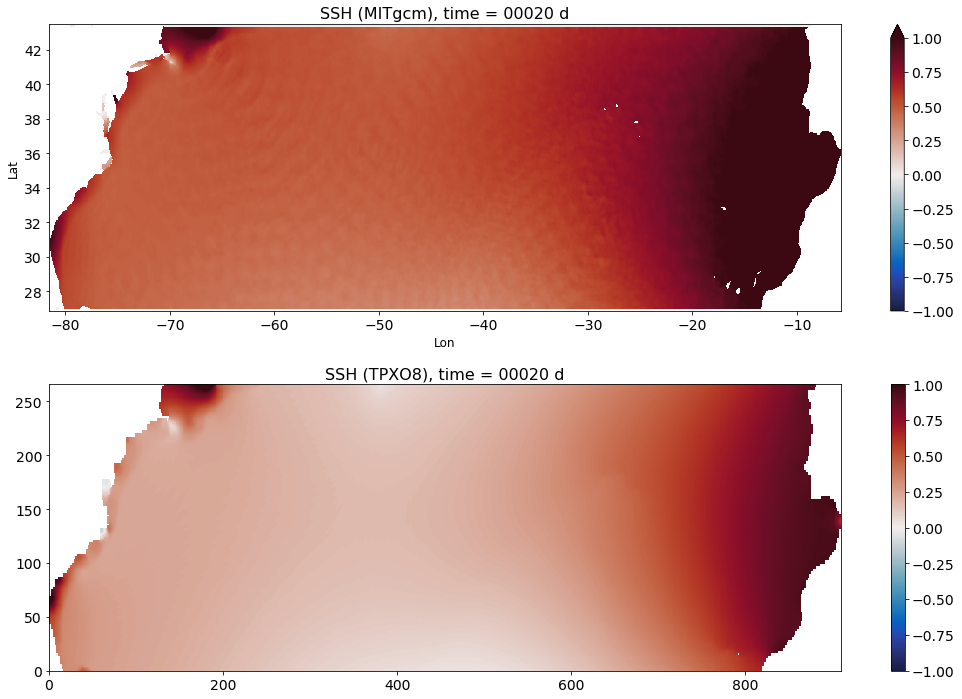

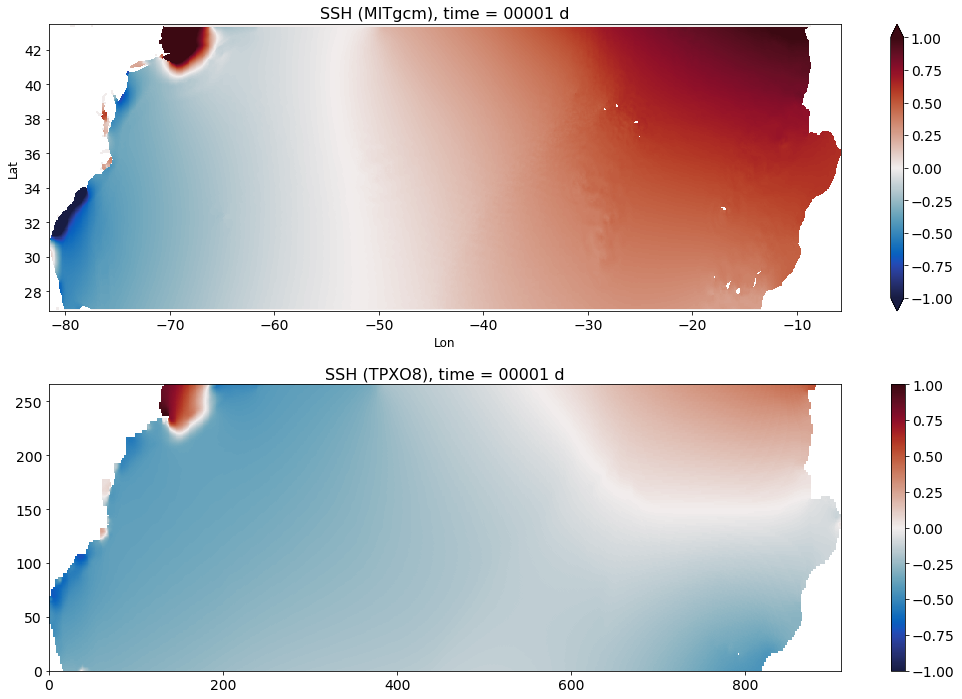

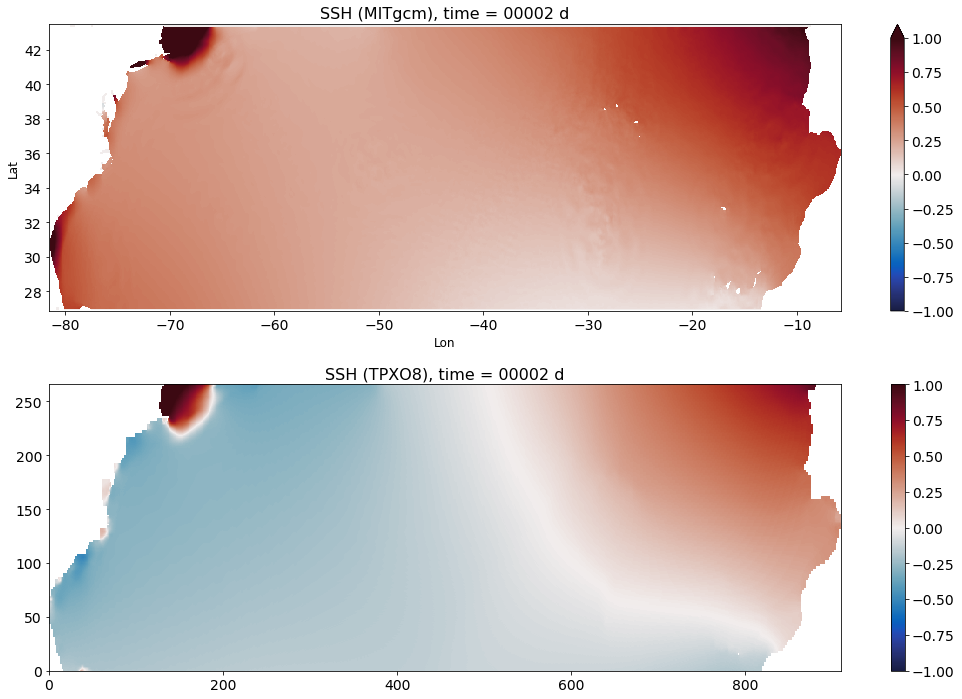

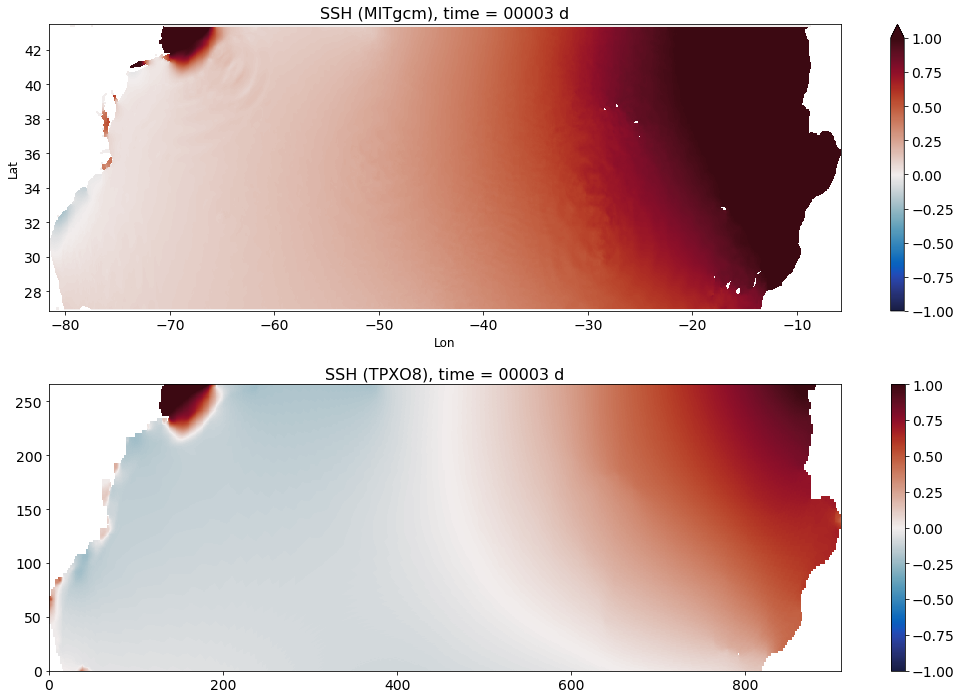

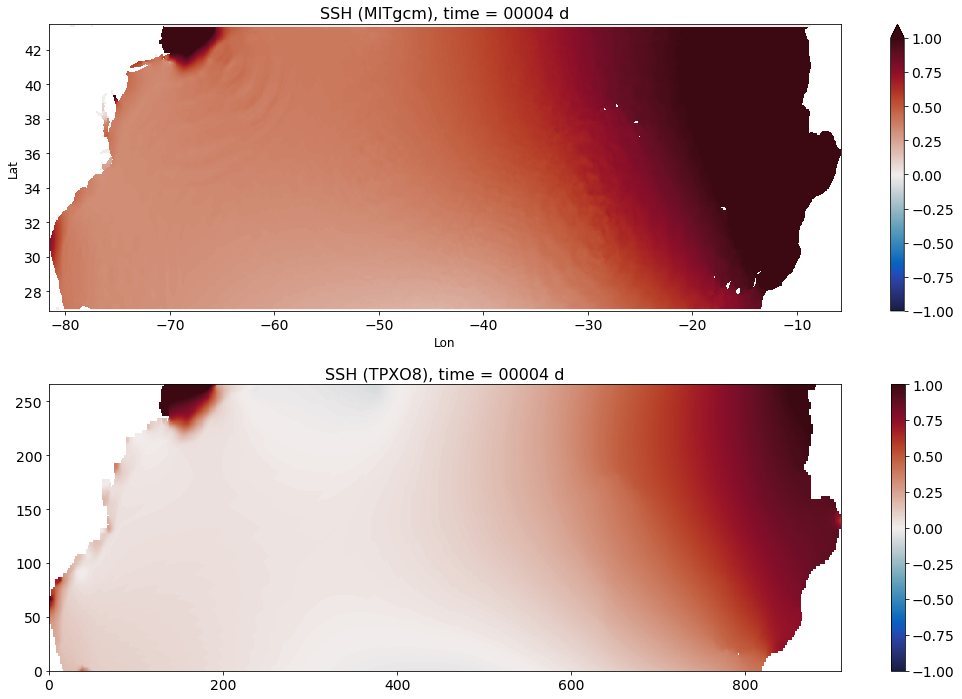

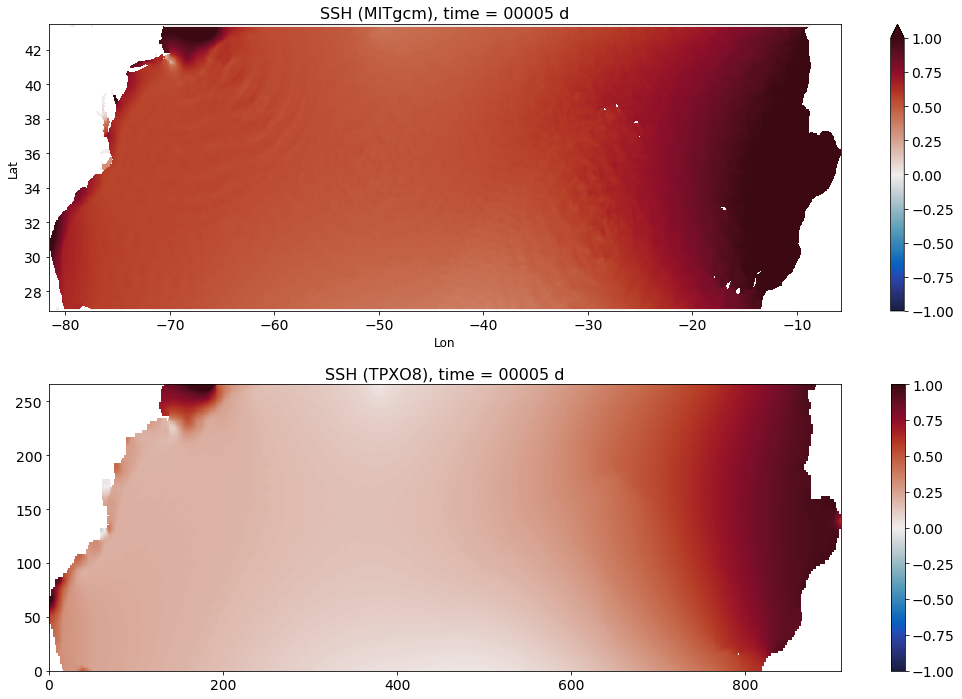

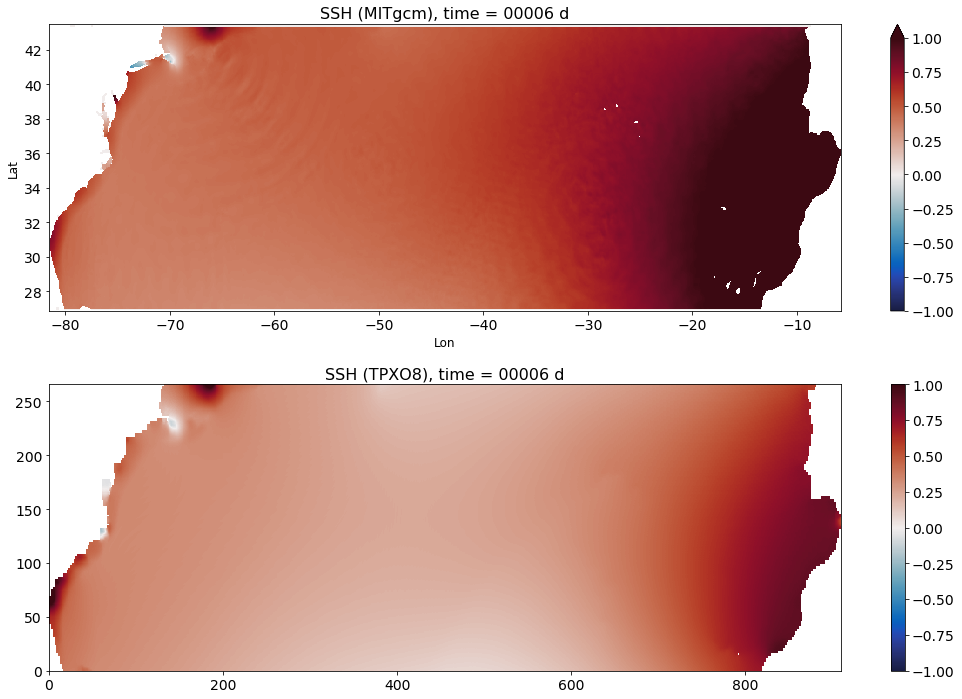

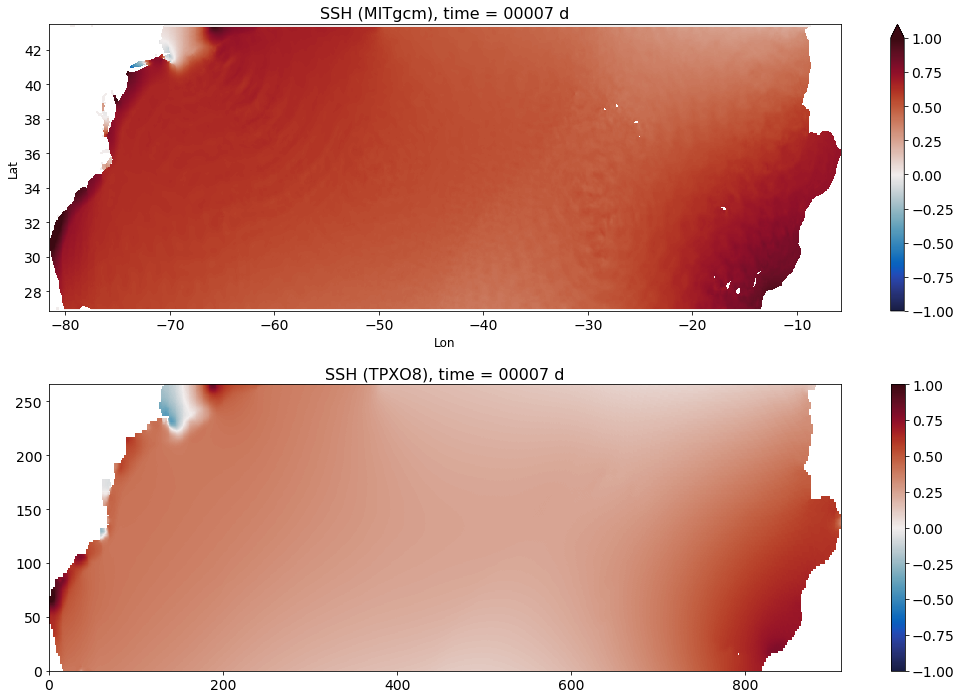

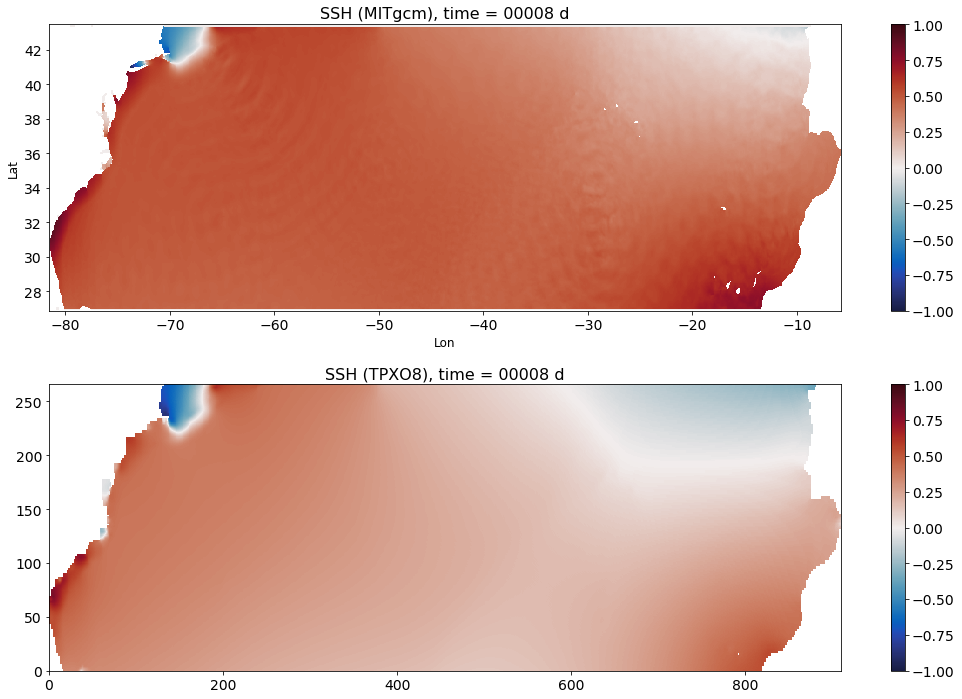

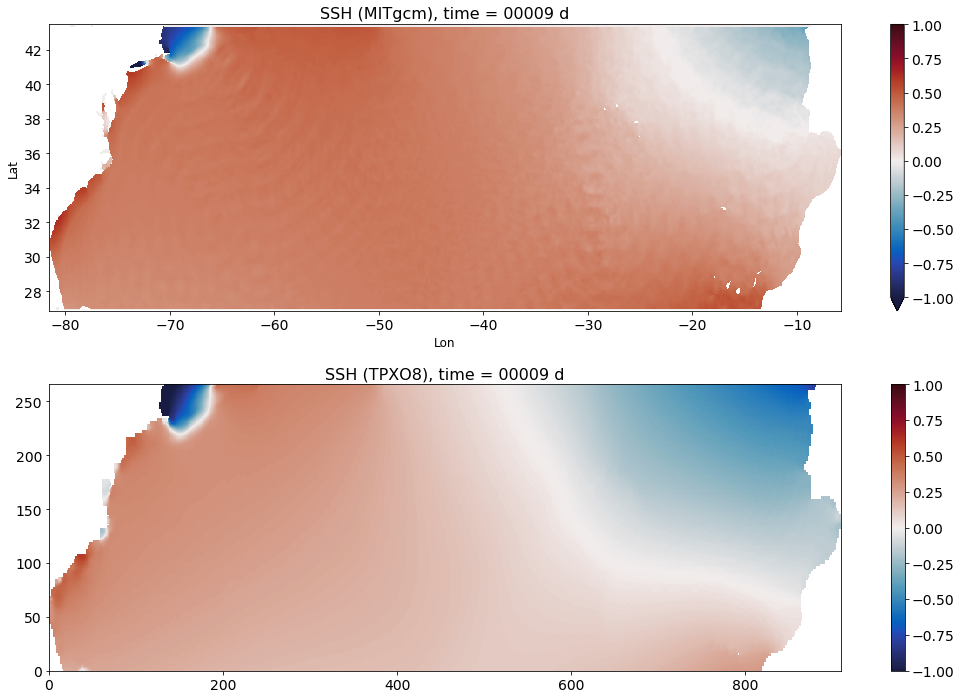

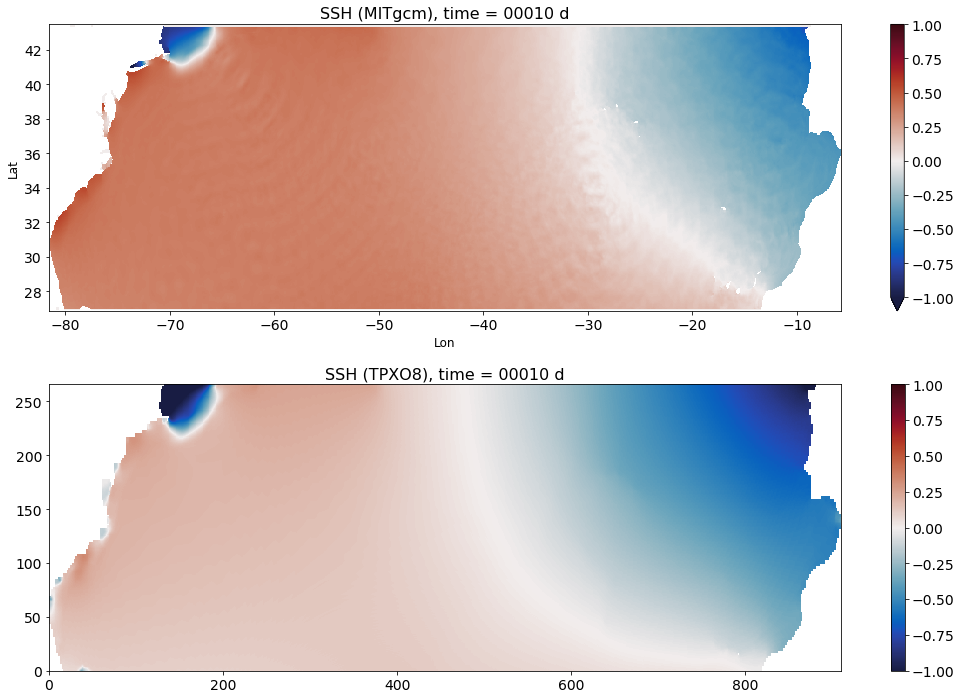

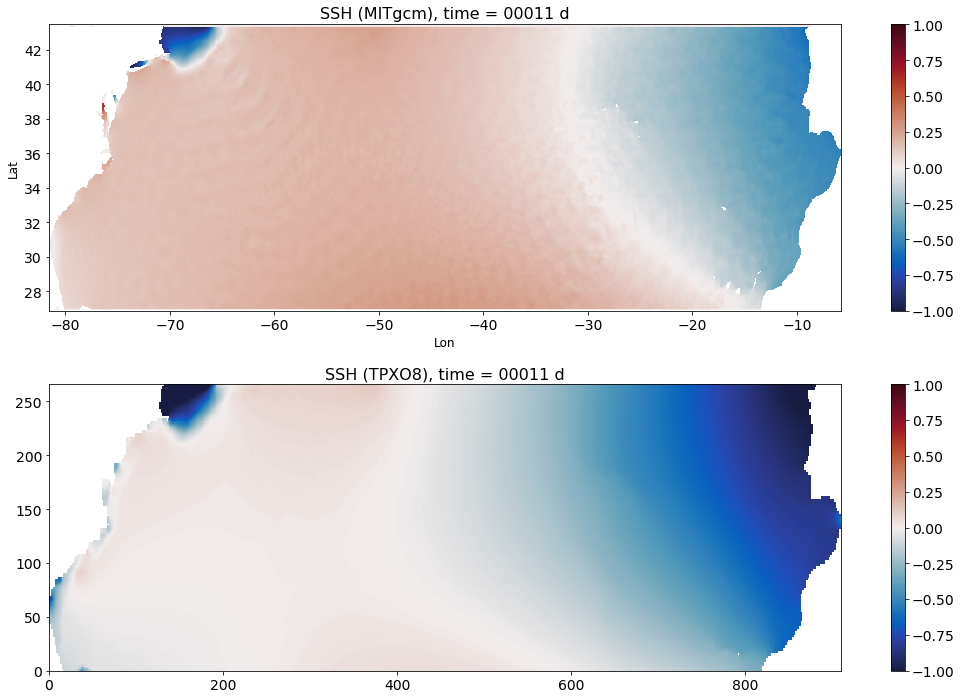

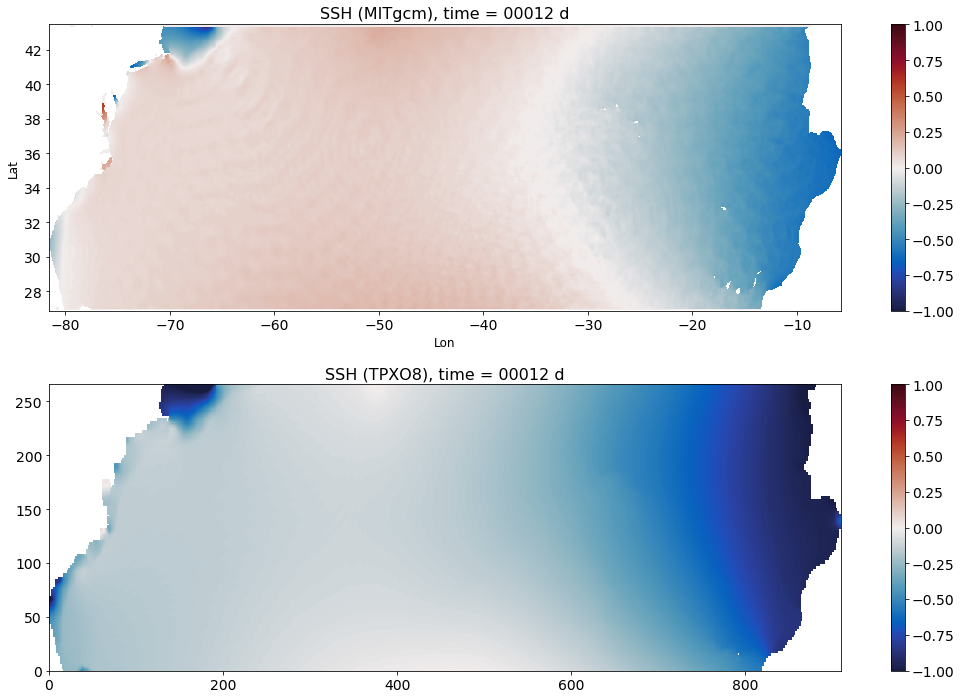

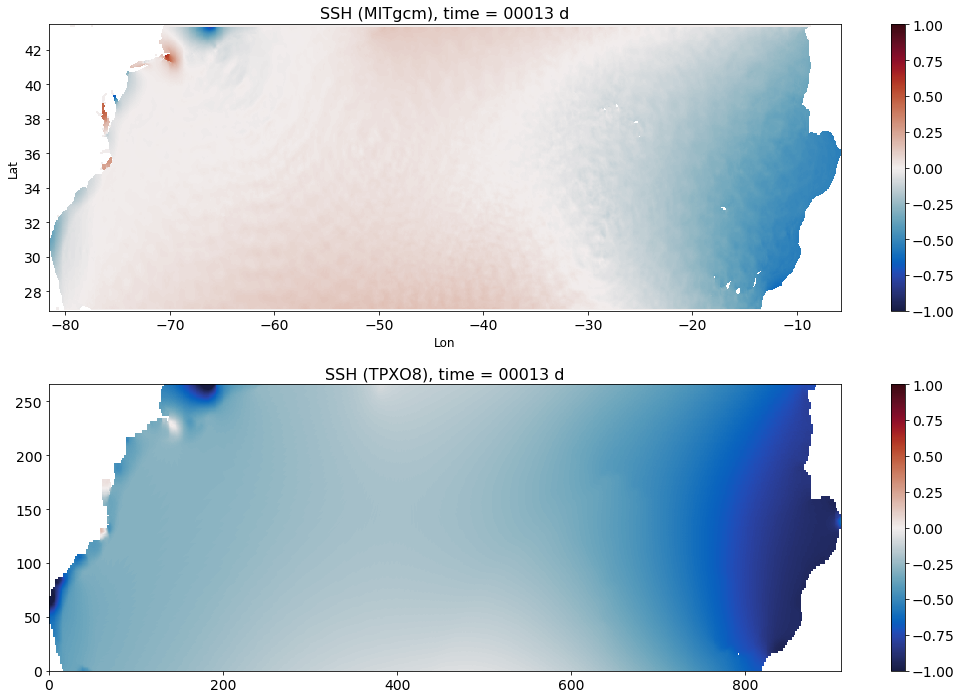

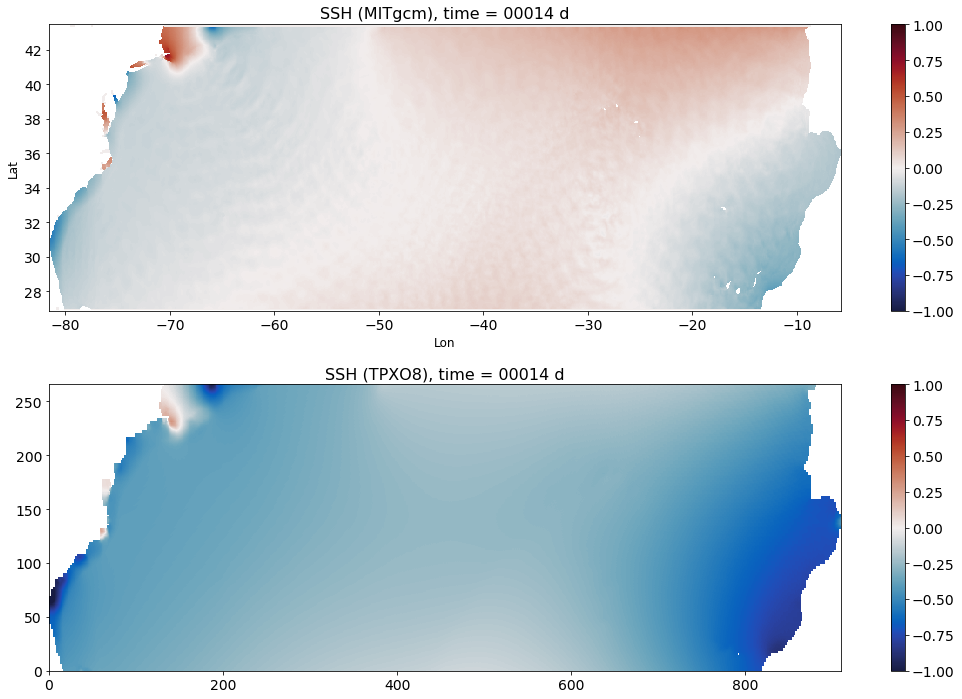

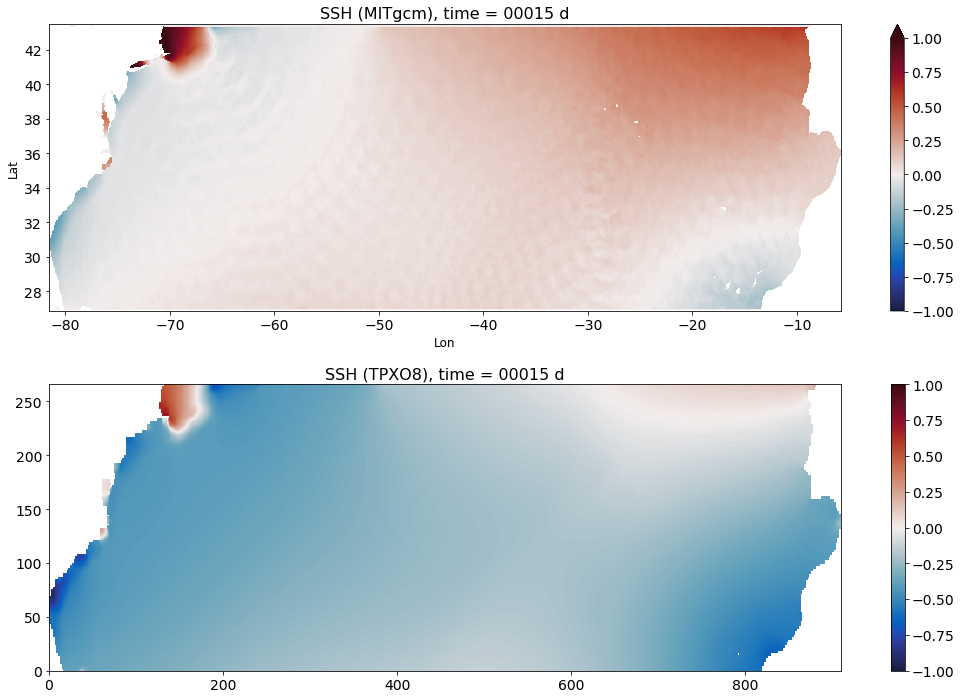

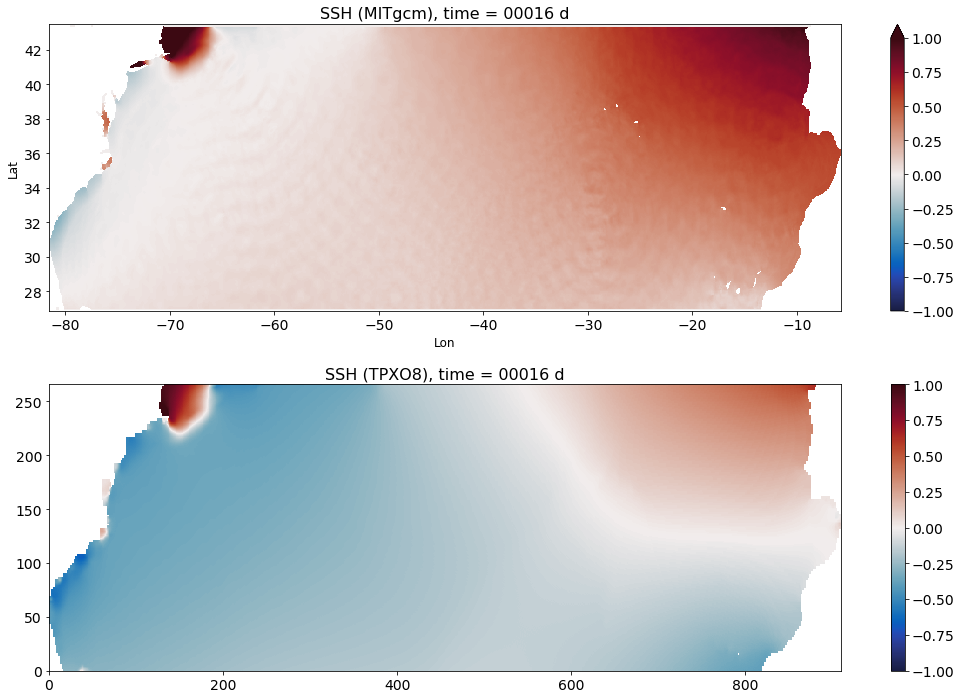

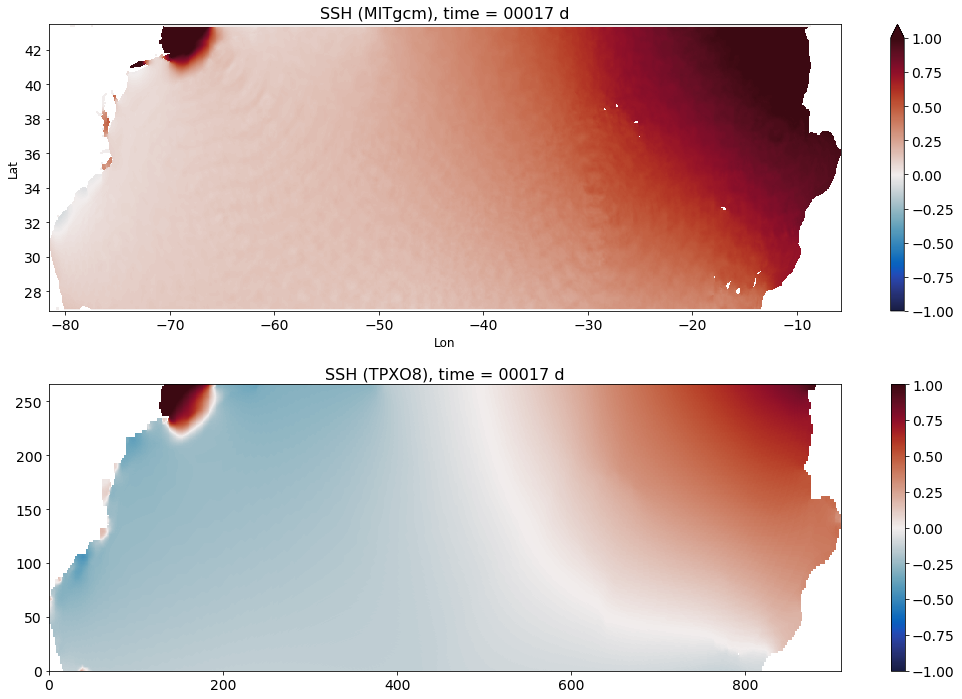

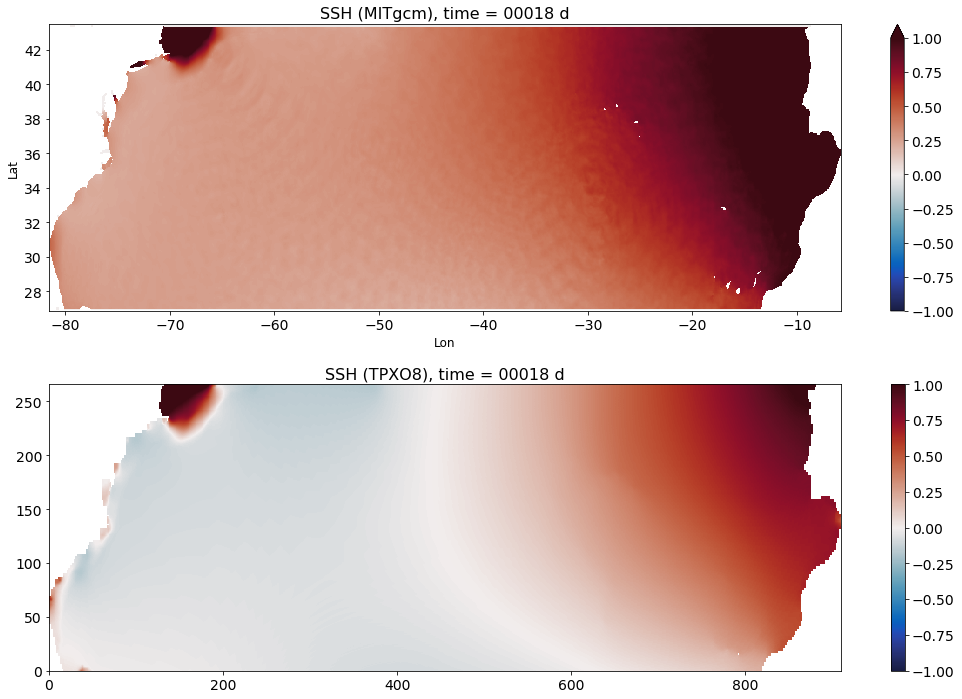

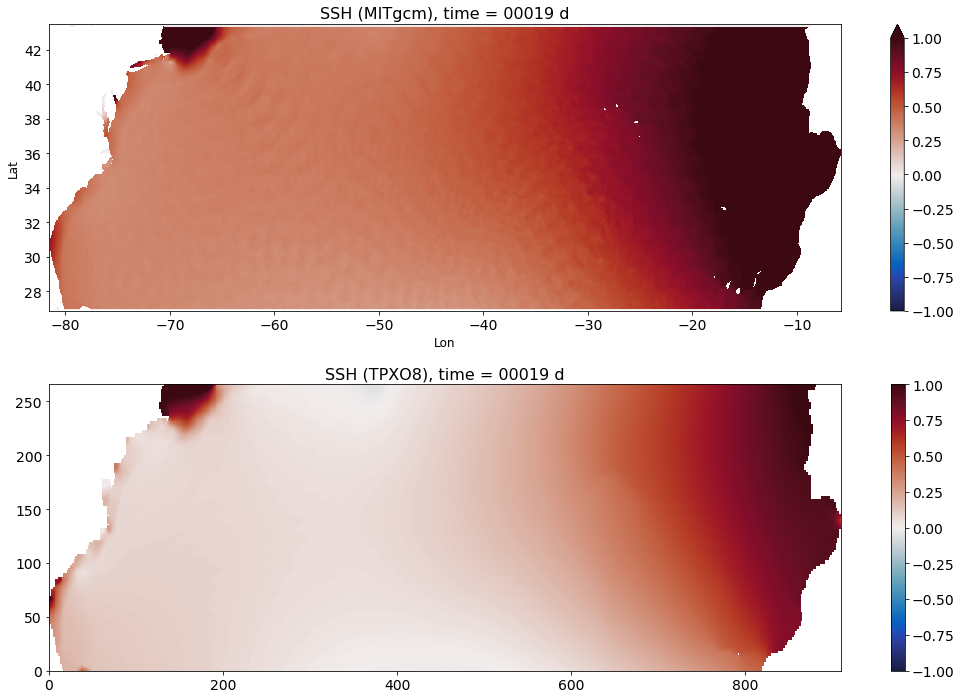

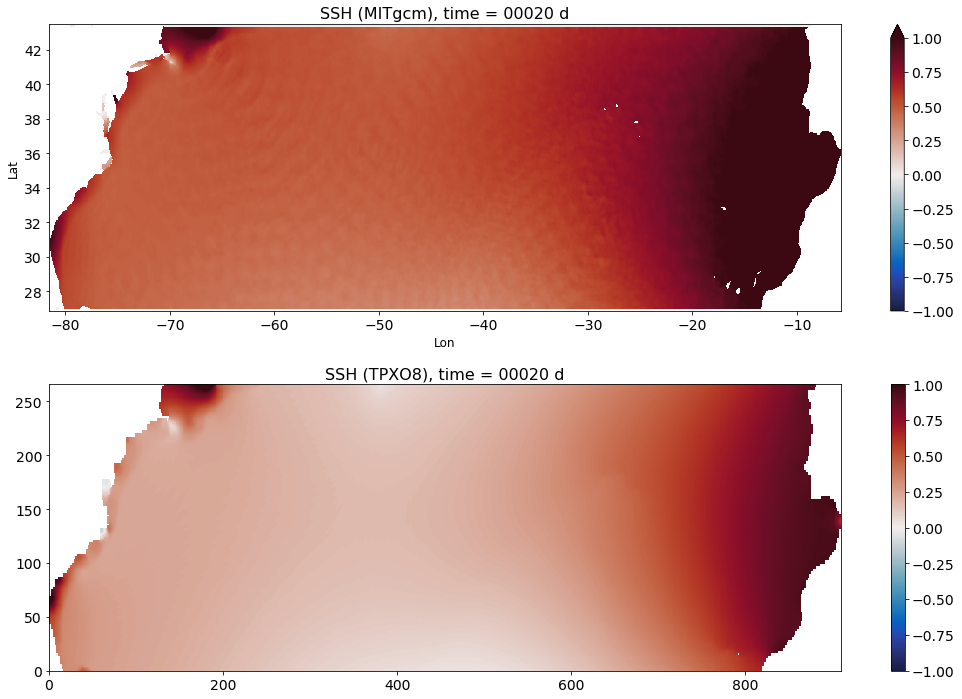

In [101]:
for i in range(20):
    plt.figure(figsize=(15,10))
    plt.subplot(211)
    ds.ETAN.where(ds.hFacC[0]).isel(time=23+i*24).plot(vmax=1, vmin=-1, cmap=cmocean.cm.balance, add_labels=False)
    plt.xlabel('Lon', fontsize=12)
    plt.ylabel('Lat', fontsize=12)
    plt.title('SSH (MITgcm), time = %05d d' %(i+1))
    
    plt.subplot(212)
    plt.pcolormesh(SSH0[i+1], cmap=cmocean.cm.balance, vmax=1, vmin=-1); plt.colorbar()
    plt.title('SSH (TPXO8), time = %05d d' %(i+1))
    plt.tight_layout()
    
    plt.savefig(figdir+'SSH_1ctides_startdate20080101_ll910_%05d'%i)

    display.clear_output(wait=True)
    display.display(plt.gcf())

    time.sleep(0.1)
    

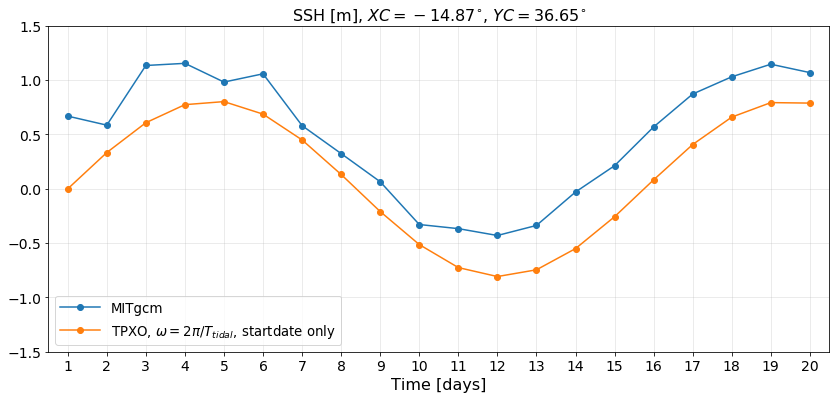

In [78]:
plt.plot(time_d[1:21],SSH_mitgcm[23::24],marker='o',label='MITgcm')

plt.plot(time_d[1:21],SSH0[1:21,150,800],marker='o', label =r'TPXO, $\omega = 2\pi/T_{tidal}$, startdate only')
plt.xticks(time_d[0:21])
plt.xlim([0.5,20.5])
plt.ylim([-1.5,1.5])
plt.xlabel('Time [days]')
plt.title(r'SSH [m], $XC=-14.87^{\circ}$, $YC=36.65^{\circ}$')
plt.legend(loc=0, fontsize='small')
plt.grid(alpha=0.3)

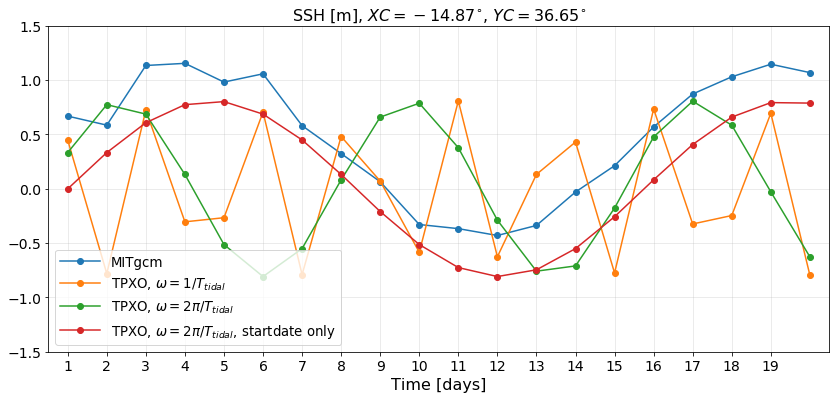

In [85]:
plt.plot(time_d[1:21],SSH_mitgcm[23::24],marker='o',label='MITgcm')
plt.plot(time_d[1:21],SSH[1:21,150,800],marker='o', label =r'TPXO, $\omega = 1/T_{tidal}$')
plt.plot(time_d[1:21],SSH2[1:21,150,800],marker='o', label =r'TPXO, $\omega = 2\pi/T_{tidal}$')
plt.plot(time_d[1:21],SSH0[1:21,150,800],marker='o', label =r'TPXO, $\omega = 2\pi/T_{tidal}$, startdate only')
plt.xticks(time_d[0:20])
plt.xlim([0.5,20.5])
plt.ylim([-1.5,1.5])
plt.xlabel('Time [days]')
plt.title(r'SSH [m], $XC=-14.87^{\circ}$, $YC=36.65^{\circ}$')
plt.legend(loc=0, fontsize='small')
plt.grid(alpha=0.3)

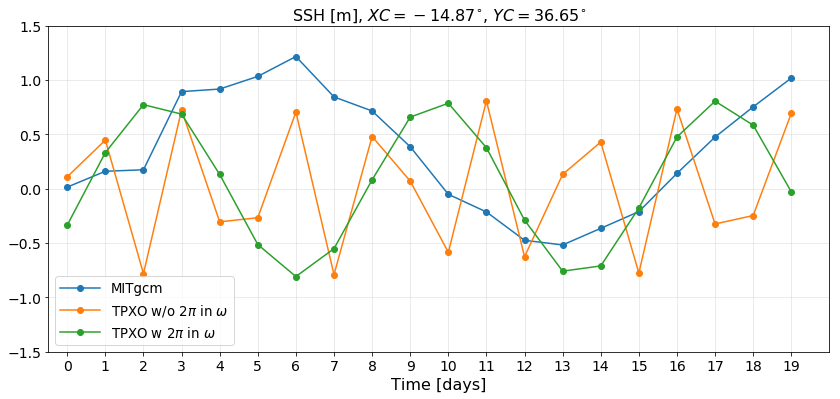

In [66]:
plt.plot(time_d[0:20],SSH_mitgcm[::24],marker='o',label='MITgcm')
plt.plot(time_d[0:20],SSH[0:20,150,800],marker='o', label =r'TPXO w/o $2\pi$ in $\omega$')
plt.plot(time_d[0:20],SSH2[0:20,150,800],marker='o', label =r'TPXO w $2\pi$ in $\omega$')
plt.xticks(time_d[0:20])
plt.xlim([-0.5,20])
plt.ylim([-1.5,1.5])
plt.xlabel('Time [days]')
plt.title(r'SSH [m], $XC=-14.87^{\circ}$, $YC=36.65^{\circ}$')
plt.legend(loc=0, fontsize='small')
plt.grid(alpha=0.3)

Text(0.5,1,'SSH (TPXO8), time = 00000 d')

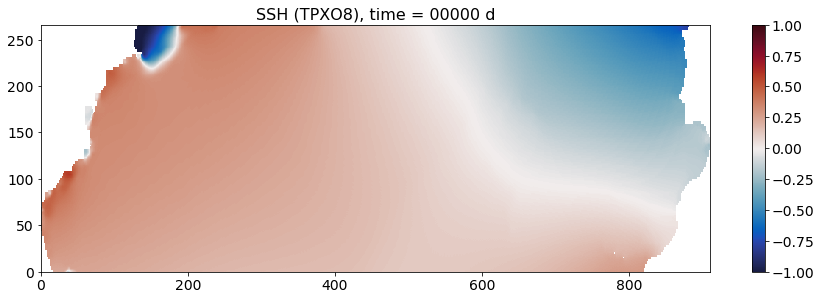

In [29]:
i = 0
SSH0 = 100*am_z_masked[:,:,0]*np.cos(tidalfreq2[0]*times[i] - tidalfreq2[0]*ph_z_masked[:,:,0])
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.pcolormesh(SSH0, cmap=cmocean.cm.balance, vmax=1, vmin=-1); plt.colorbar()

plt.title('SSH (TPXO8), time = %05d d' %(i))

In [10]:
time0=0

In [14]:
tidalfreq.shape

(13,)

In [18]:
tidalfreq_matrix = np.ones_like(ph_z_masked)*tidalfreq

In [159]:
tidalfreq_matrix.shape

(266, 910, 13)

In [21]:
times = np.linspace(0,29,30)*86400
j=0

SSH0 = 100*am_z_masked[:,:,0]*np.cos(tidalfreq_matrix[:,:,0]*times[j] - tidalfreq_matrix[:,:,0]*ph_z_masked[:,:,0])

In [22]:
SSH0.shape

(266, 910)

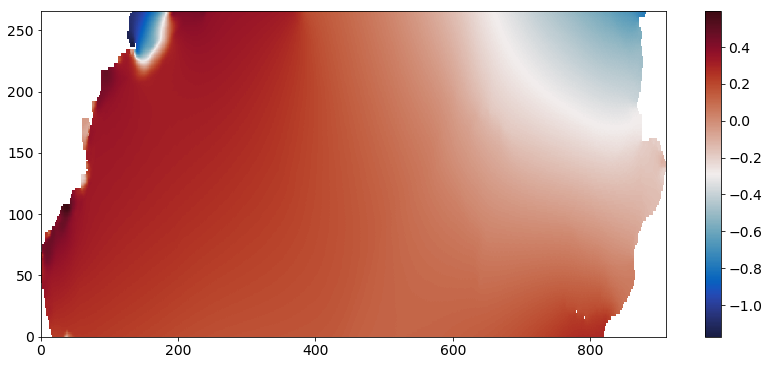

In [23]:
plt.pcolormesh(SSH0, cmap=cmocean.cm.balance);
plt.colorbar()

Text(0.5,1,'SSH (MITgcm), time = 00000 d')

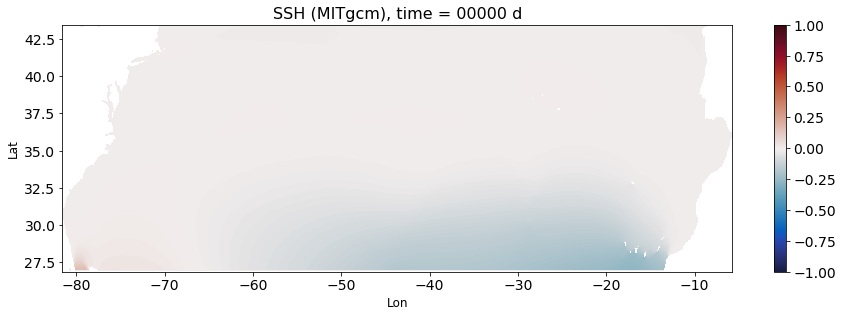

In [34]:
i = 0
plt.figure(figsize=(15,10))
plt.subplot(211)
ds.ETAN.where(ds.hFacC[0]).isel(time=i*24).plot(vmax=1, vmin=-1, cmap=cmocean.cm.balance, add_labels=False)
#plt.clim([-1,1]);plt.colorbar()
plt.xlabel('Lon', fontsize=12)
plt.ylabel('Lat', fontsize=12)
plt.title('SSH (MITgcm), time = %05d d' %(i))

In [168]:
SSH = np.sum(SSH0, axis=2)

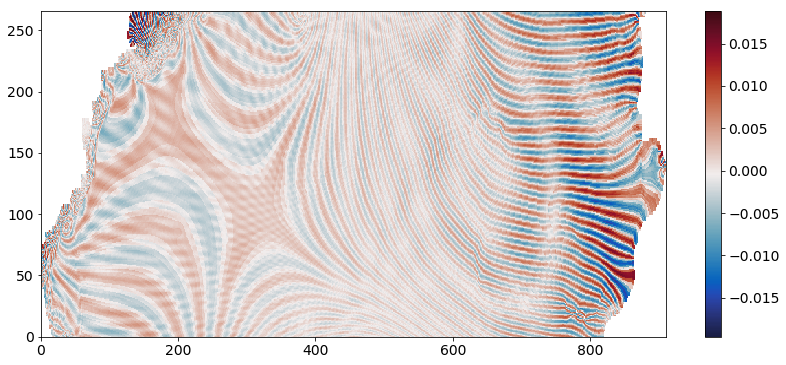

In [169]:
plt.pcolormesh(SSH, cmap=cmocean.cm.balance);plt.colorbar()

In [101]:
times = np.linspace(0,29,30)*86400

In [174]:
ph_z_masked[:,:,0].min()

-507439650.0

In [179]:
(tidalfreq_matrix* times[-1]).max()

716.50889051855

In [ ]:
vam(1)*cos(omega*(6*3600-vph(1)))*100

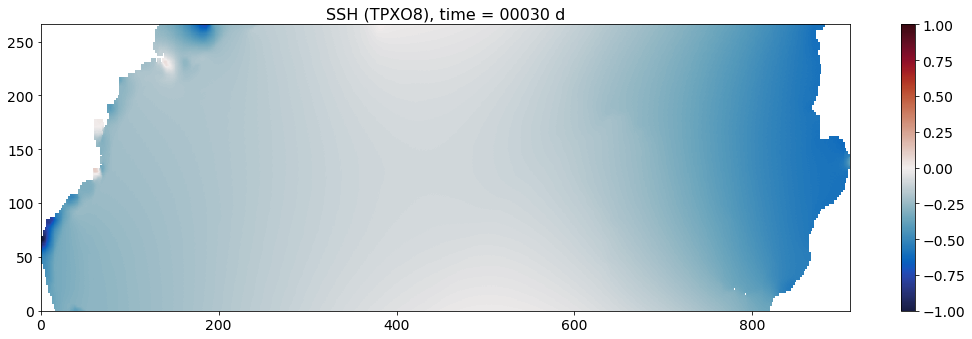

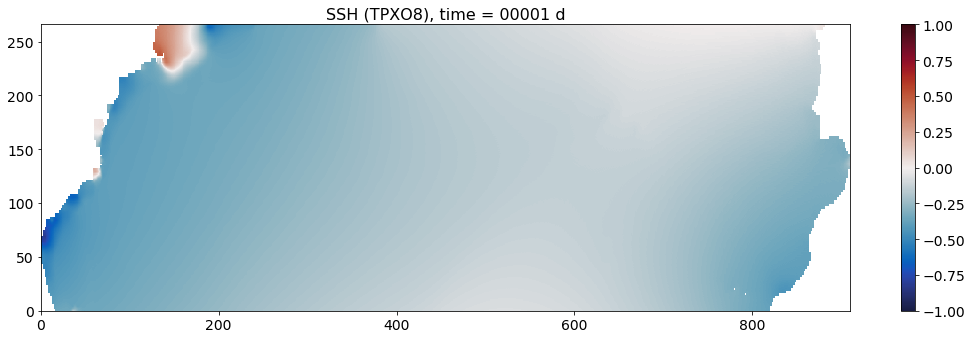

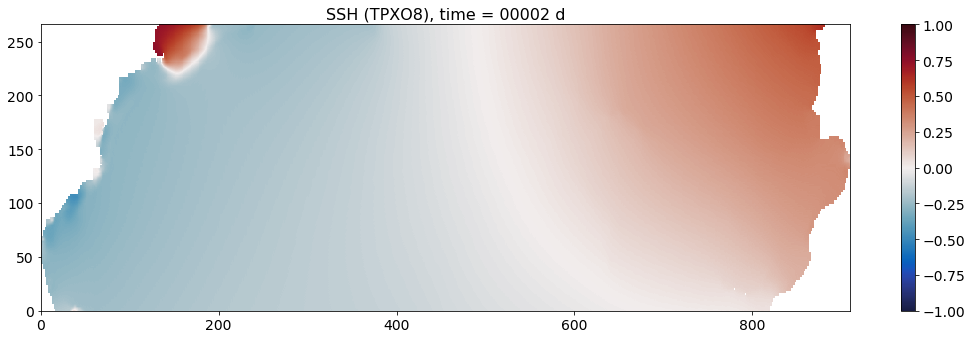

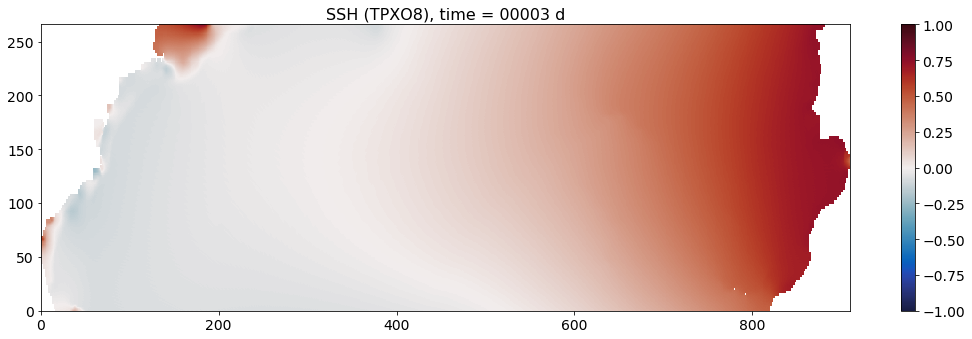

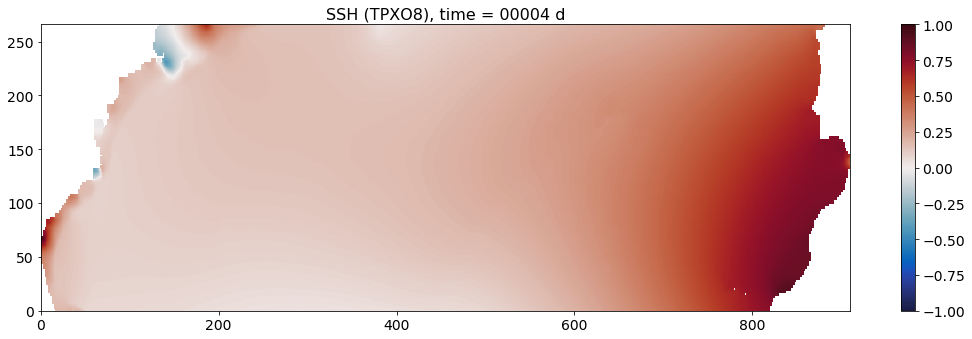

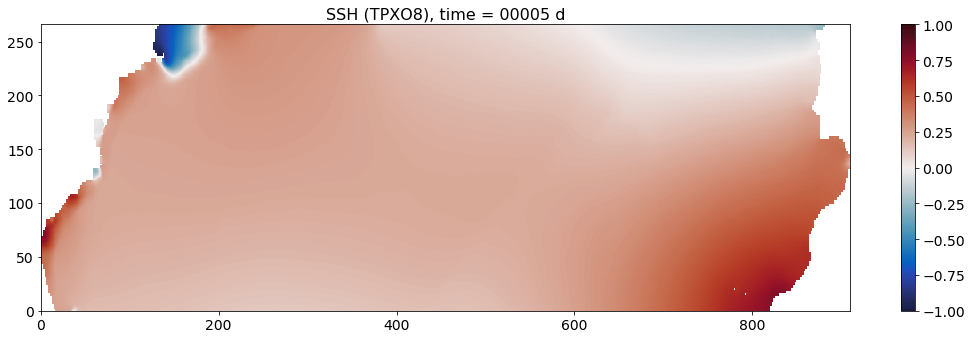

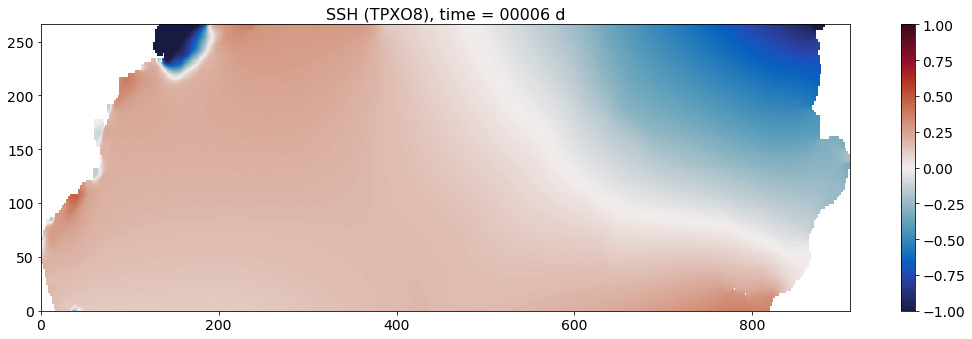

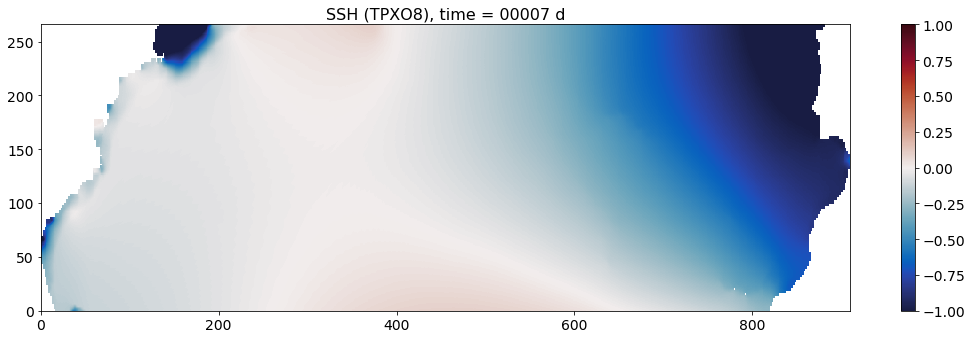

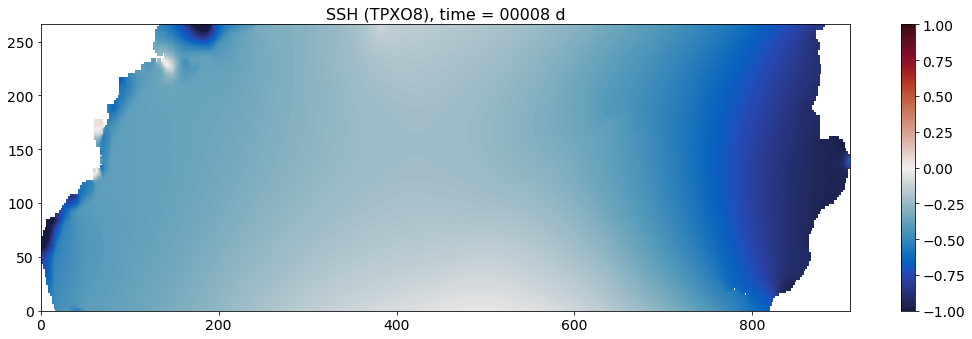

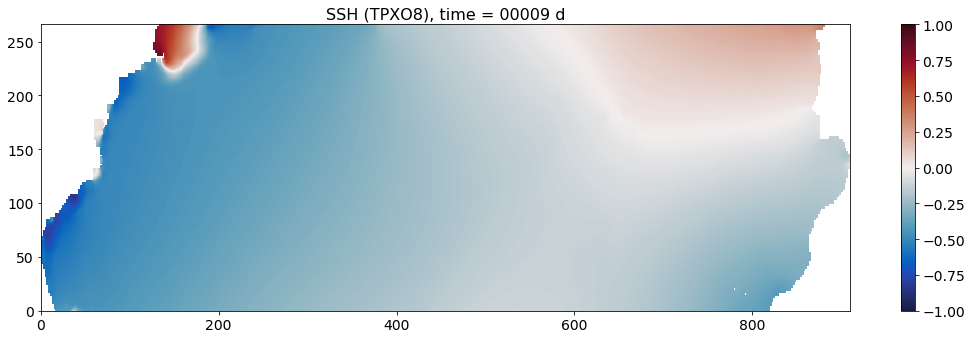

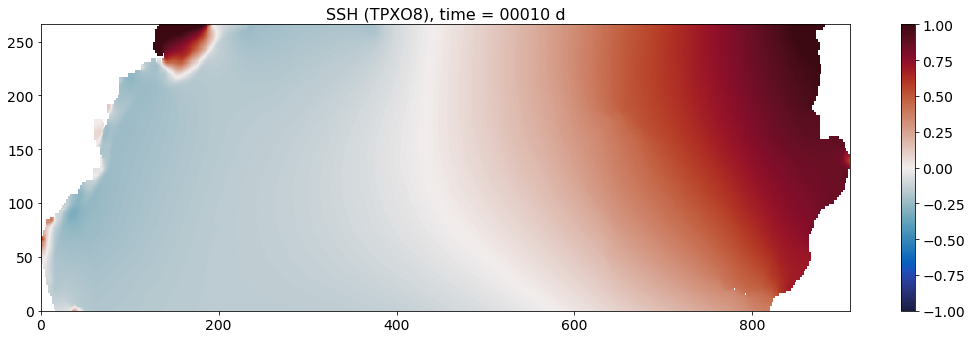

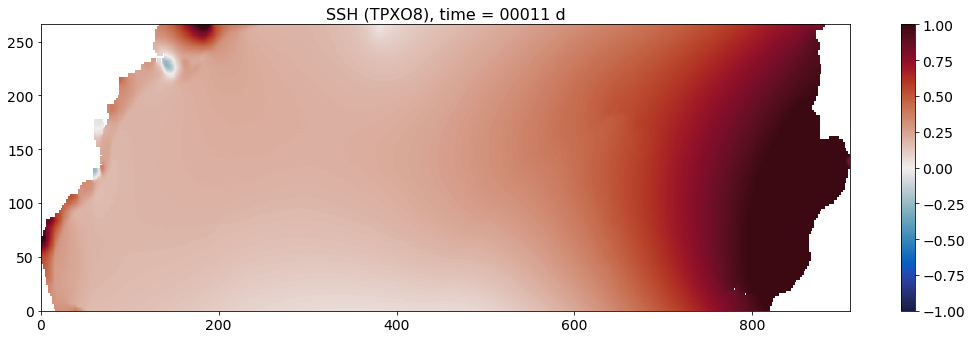

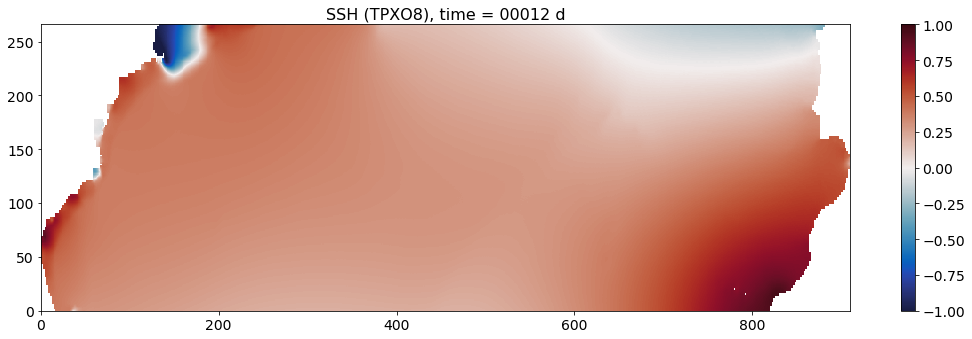

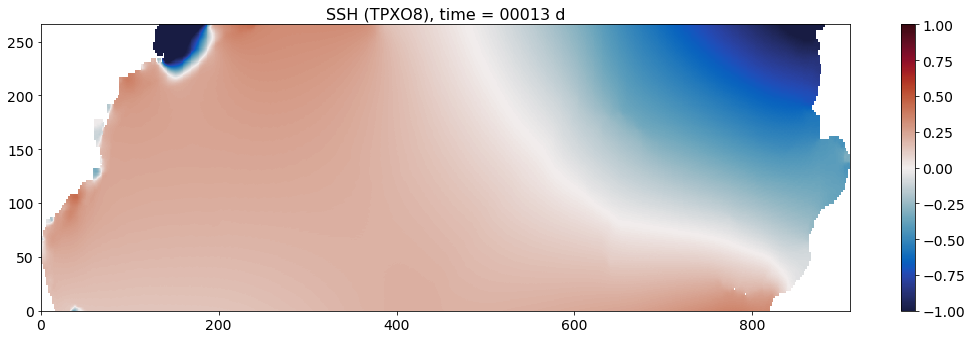

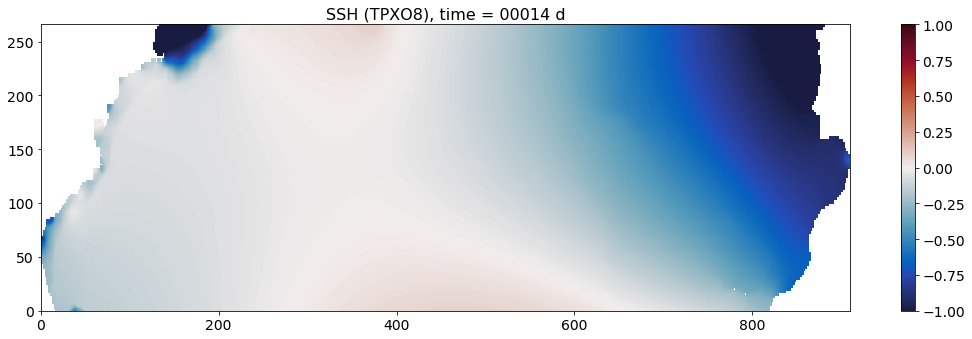

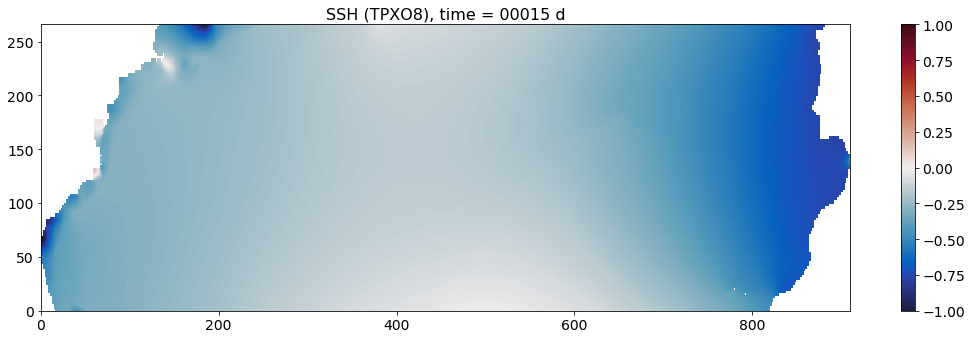

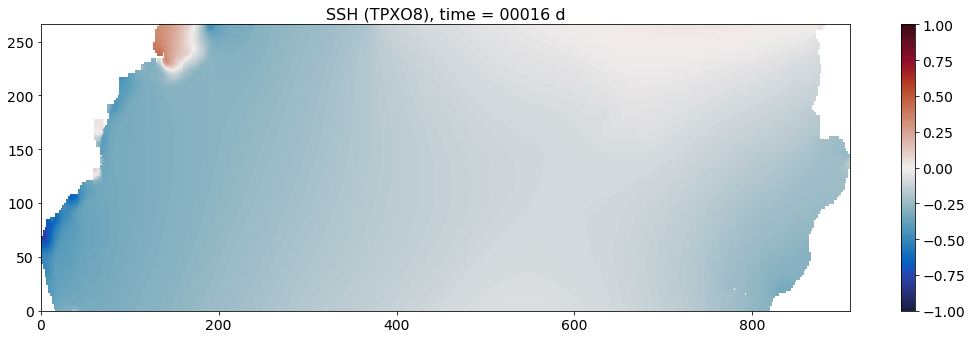

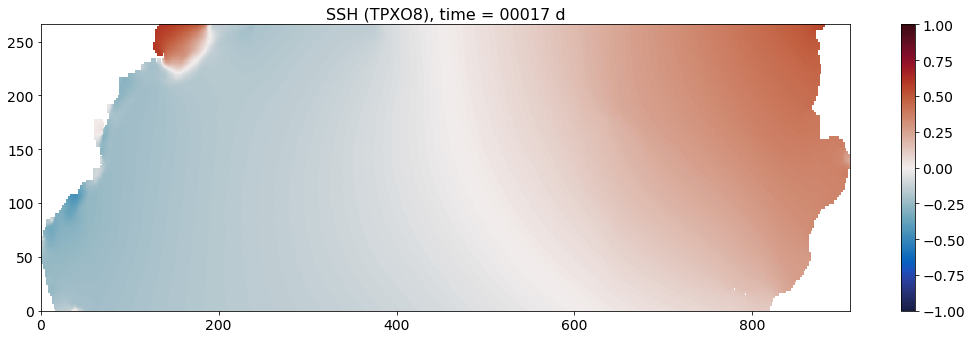

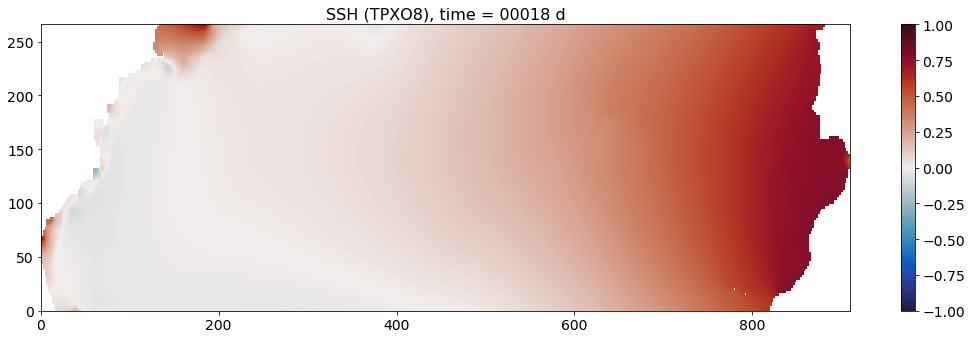

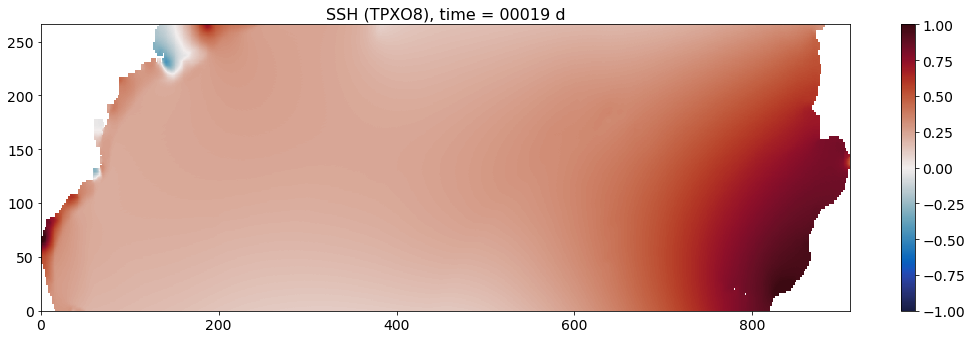

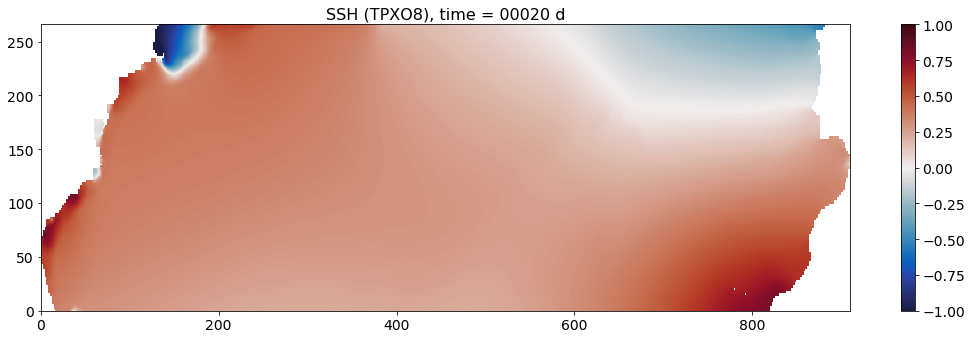

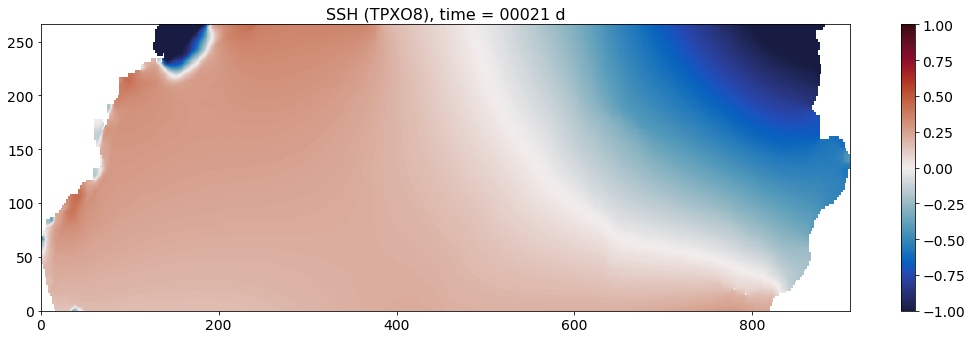

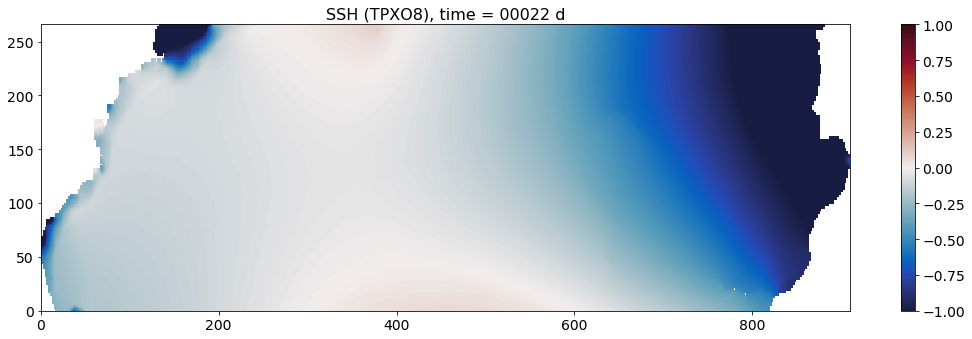

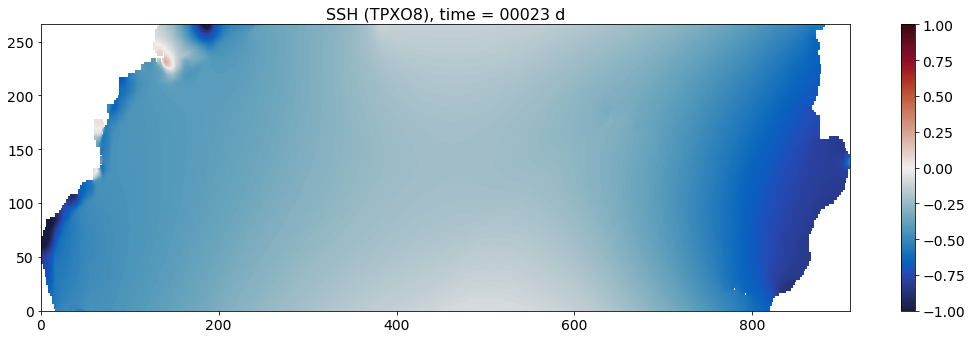

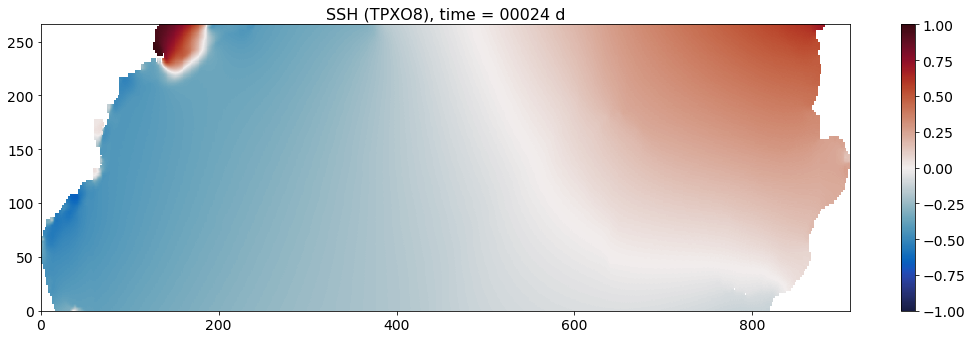

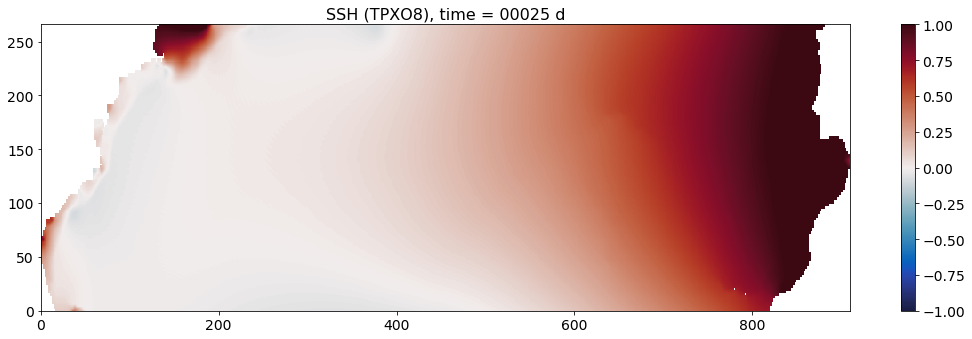

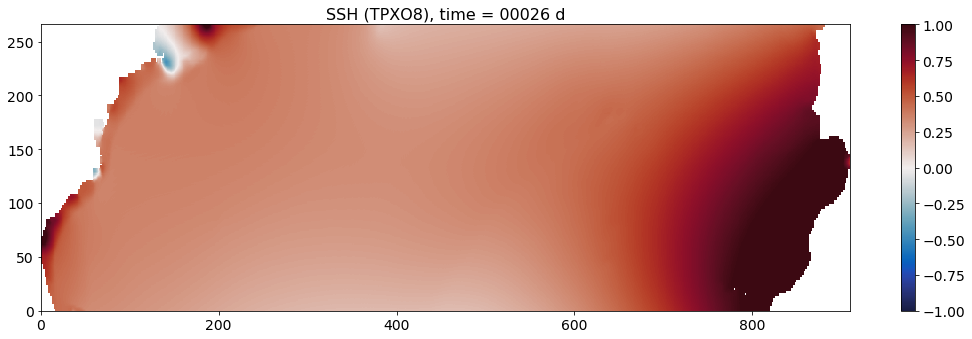

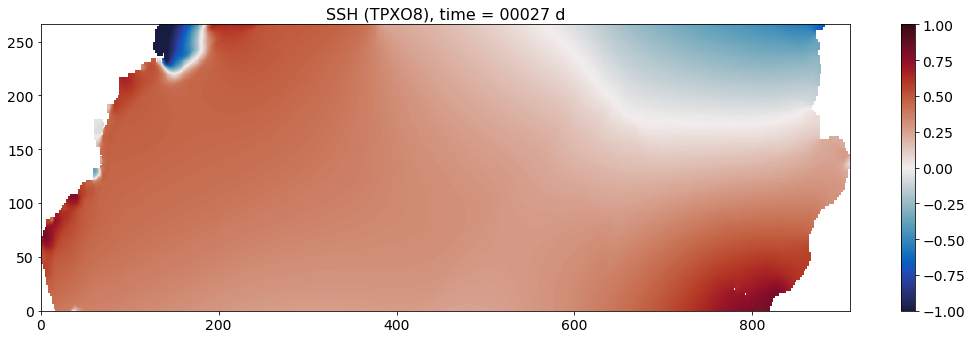

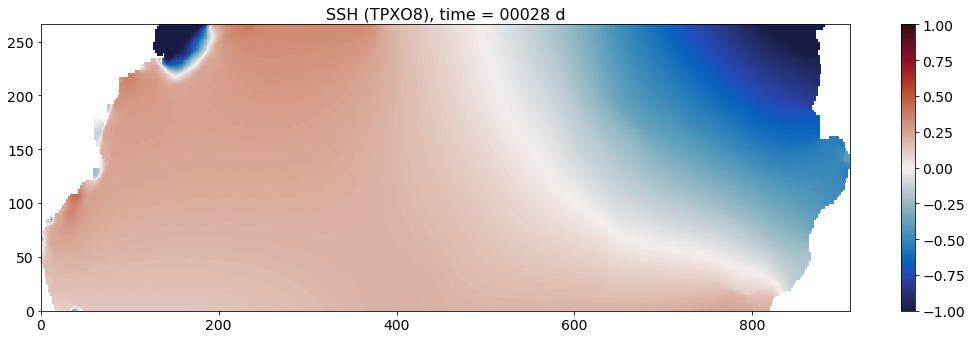

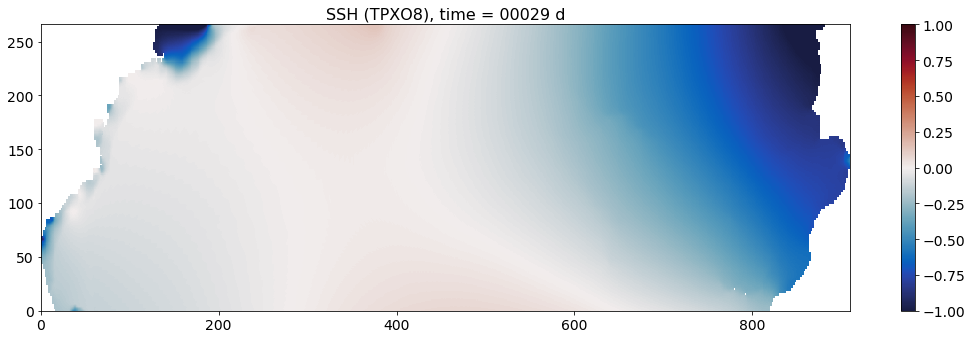

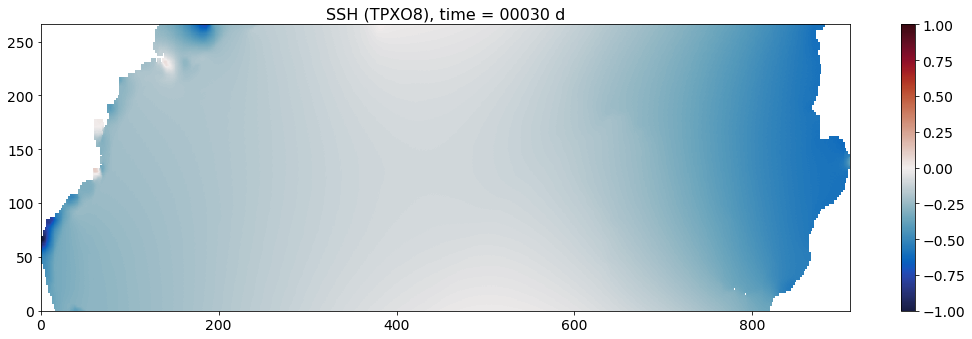

In [182]:
for j in range(30):
    f_amps = open(dir_tides+'am_z_%05d.bin' %(j+1), 'rb')
    am_z = np.fromfile(f_amps, '>f4')
    am_z.shape = (266,910,13)
    f_amps.close()
    f_ph = open(dir_tides+'ph_z_%05d.bin' %(j+1), 'rb')
    ph_z = np.fromfile(f_ph, '>f4')
    ph_z.shape = (266,910,13)
    f_ph.close()
    ph_z_masked = np.ma.masked_where(watermask==True, ph_z)
    am_z_masked = np.ma.masked_where(watermask==True, am_z)
    
    SSH = 100*np.sum(am_z_masked*np.cos(tidalfreq_matrix*times[j] - tidalfreq_matrix*ph_z_masked), axis=2)
    plt.figure(figsize=(15,5))
    plt.pcolormesh(SSH, cmap=cmocean.cm.balance, vmax=1, vmin=-1); plt.colorbar()
    plt.title('SSH (TPXO8), time = %05d d' %(j+1))
    plt.tight_layout()
    
    plt.savefig(figdir+'tpxo_SSH_ll910_%05d'%j)

    display.clear_output(wait=True)
    display.display(plt.gcf())

    time.sleep(0.1)
    

In [40]:
ds.ETAN

<xarray.DataArray 'ETAN' (time: 240, YC: 266, XC: 910)>
dask.array<shape=(240, 266, 910), dtype=float32, chunksize=(1, 266, 910)>
Coordinates:
  * XC       (XC) >f4 -81.54167 -81.458336 -81.375 ... -5.8750024 -5.7916694
  * YC       (YC) >f4 26.889458 26.95777 27.02604 ... 43.38593 43.44224
    rA       (YC, XC) >f4 dask.array<shape=(266, 910), chunksize=(266, 910)>
    Depth    (YC, XC) >f4 dask.array<shape=(266, 910), chunksize=(266, 910)>
    maskInC  (YC, XC) >f4 dask.array<shape=(266, 910), chunksize=(266, 910)>
    iter     (time) int64 dask.array<shape=(240,), chunksize=(1,)>
  * time     (time) int64 3600 7200 10800 14400 ... 853200 856800 860400 864000
Attributes:
    standard_name:  ETAN
    long_name:      Surface Height Anomaly
    units:          m

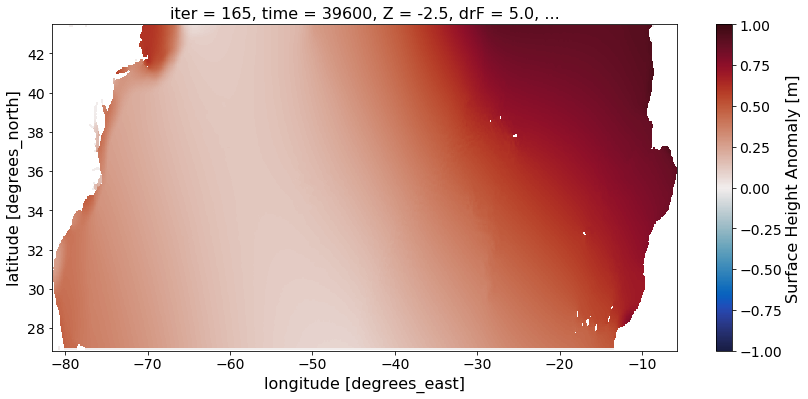

In [43]:
ds.ETAN.where(ds.hFacC[0]).isel(time=10).plot(vmax=1, vmin=-1, cmap=cmocean.cm.balance)